# Obesity Data Analysis and Prediction

## Prepared By . Abhi Khan 
## Dated : 06 Apr 2024
## Contact : Abhikhan2999@gmail.com

## 1. Introduction
   - To find out the Obesity in different geographic locations and effect of Sex, Physical activities, Grades and Meal. Keeping the avalaible features predict the different Grades of Obesity.

## 2. Data Collection
   - In Total 4 x Datasets have been collected as:-
     - Adolescent Obese : The dataset is collected from Kaggle and contains the geographic distribution of miscalinous locations in USA.
     - Adult Obese : The dataset is collected from Kaggle and contains additional geographic distribution of miscalinous locations in USA.
     - Nutrition PA Obesity : The dataset is collected from Kaggle and it contains the analysis of the surveys carried out in Albama State among students with their details and distributions
     - Wt Obesity : The dataset is collected from Kaggle and it contains the Obesity ratio among different races, sex, grades and effects of physical activites over the grades of obesity.

## 3. Preprocessing and Exploratory Data Analysis
   - Familiration with the dataset i.e Number of Rows, description of the columns, Missing Values, Distribution of data and Outliers detections.
   - Impute Missing Values, Remove the outliers, Encode the categorical Values and rectify the data types to make it ready for the evaluation.
   - Conduct descriptive statistics to understand the distribution and summary of the data.
   - Visualize the data using graphs and charts to identify patterns, trends, and relationships.
   - Analyze the distribution of obesity rates across different factors such as gender, grade, race/ethnicity, and state.

## 4. Feature Engineering
   - Combine the dataset into one, so that all information is concentrated and catered for and each feature play its role in predictions.
   - Transform and engineer relevant features for better model performance.
   - Create new features or combine existing features to capture meaningful information.

## 5. Machine Learning Model Selection
   - Identify the ML Alogorithims which suits our goal like predictions of Wether indl will have obesity or not
   - Identigy an regression problem and then apply the ML model for prediction
   - Algorithms such as regression, classification, or ensemble methods that can handle predicting obesity rates based on the available factors will be implemented
## 6. Model Training and Evaluation
   - Split the data into training and testing sets.
   - Train the selected machine learning models on the training set.
   - Evaluate model performance using appropriate metrics such as accuracy, precision, recall, and mean squared error.
   - Fine-tune the models using techniques like cross-validation or hyperparameter tuning.

## 7. Interpretation and Insights
   - Analyze the trained models to identify the most important factors influencing obesity rates.
   - Interpret the model results and provide insights into the relationship between obesity rates and factors like gender, grade, race/ethnicity, and state.
   - Identify any significant patterns, trends, or correlations discovered in the data.

## 8. Conclusion and Recommendations
   - Summarize the findings and conclusions drawn from the analysis.
   - Provide recommendations for interventions or strategies to address and reduce obesity rates among students, locations or as per their physical activites


In [1]:
# Import Necessary libraires
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Lets load the data
adolecent_obesity = pd.read_csv('adolescent_obese.csv')
adolecent_obesity.head()

,Location,Value,95% CI,Sample Size
0,National,13.7,(12.6-14.9),"12,580"
1,Alabama,17.1,(14.6-19.9),"1,499"
2,Alaska,12.4,(10.5-14.6),"1,167"
3,Arizona,10.7,(8.3-13.6),"1,520"
4,Arkansas,17.8,(15.7-20.1),"1,470"


In [3]:
adult_obesity = pd.read_csv('adult_obese.csv')
adult_obesity.head()

,Location,Value,95% CI,Sample Size
0,NaN,NaN,NaN,NaN
1,National,28.9,(28.6-29.2),"425,875"
2,Alabama,33.5,(32.1-35.0),"8,190"
3,Alaska,29.7,(27.8-31.7),"4,142"
4,Arizona,28.9,(27.7-30.2),"13,849"


In [4]:
nutrition_obesity = pd.read_csv("Nutrition_PA_Obesity.csv")
nutrition_obesity.head()

,YearStart,YearEnd,LocationAbbr,State,Class,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Grade,Race_Ethnicity
0,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,12.3,9.8,15.2,1526.0,NaN,NaN,NaN
1,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,7.6,5.4,10.4,831.0,Female,NaN,NaN
2,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races
3,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,10.2,7.2,14.4,885.0,NaN,NaN,Non-Hispanic White
4,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander


In [5]:
wt_obesity = pd.read_csv("Wt_Obesity.csv")
wt_obesity.head()

,unit,classification1,demographic_group,year,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over
0,"Percent of population, age-adjusted",Total,20 years and over,1988-1994,41.6,0,0,0,1,0,0,0,0,0,0,0,0
1,"Percent of population, age-adjusted",Total,20 years and over,1999-2002,33.0,0,0,0,1,0,0,0,0,0,0,0,0
2,"Percent of population, age-adjusted",Total,20 years and over,2001-2004,32.3,0,0,0,1,0,0,0,0,0,0,0,0
3,"Percent of population, age-adjusted",Total,20 years and over,2003-2006,31.6,0,0,0,1,0,0,0,0,0,0,0,0
4,"Percent of population, age-adjusted",Total,20 years and over,2005-2008,30.8,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
#Lets Explore the datasets one by one
adolecent_obesity.shape


(43, 4)

In [7]:
adolecent_obesity.head()


,Location,Value,95% CI,Sample Size
0,National,13.7,(12.6-14.9),"12,580"
1,Alabama,17.1,(14.6-19.9),"1,499"
2,Alaska,12.4,(10.5-14.6),"1,167"
3,Arizona,10.7,(8.3-13.6),"1,520"
4,Arkansas,17.8,(15.7-20.1),"1,470"


In [8]:
# Lets Find out about the missing values and dtypes 
adolecent_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     43 non-null     object 
 1   Value        43 non-null     float64
 2   95% CI       43 non-null     object 
 3   Sample Size  43 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [9]:
#Lets see the description of the data
adolecent_obesity.describe()


,Value
count,43.000000
mean,12.632558
std,2.392122
min,6.400000
25%,11.300000
50%,12.500000
75%,13.600000
max,18.000000


In [10]:
#Lets see the adult obesity data
adult_obesity.shape


(55, 4)

In [11]:
adult_obesity.head()    

,Location,Value,95% CI,Sample Size
0,NaN,NaN,NaN,NaN
1,National,28.9,(28.6-29.2),"425,875"
2,Alabama,33.5,(32.1-35.0),"8,190"
3,Alaska,29.7,(27.8-31.7),"4,142"
4,Arizona,28.9,(27.7-30.2),"13,849"


In [12]:
#drop the second row as it is empty
adult_obesity = adult_obesity.drop(adult_obesity.index[0])
adult_obesity.head()

,Location,Value,95% CI,Sample Size
1,National,28.9,(28.6-29.2),"425,875"
2,Alabama,33.5,(32.1-35.0),"8,190"
3,Alaska,29.7,(27.8-31.7),"4,142"
4,Arizona,28.9,(27.7-30.2),"13,849"
5,Arkansas,35.9,(33.8-38.0),"4,886"


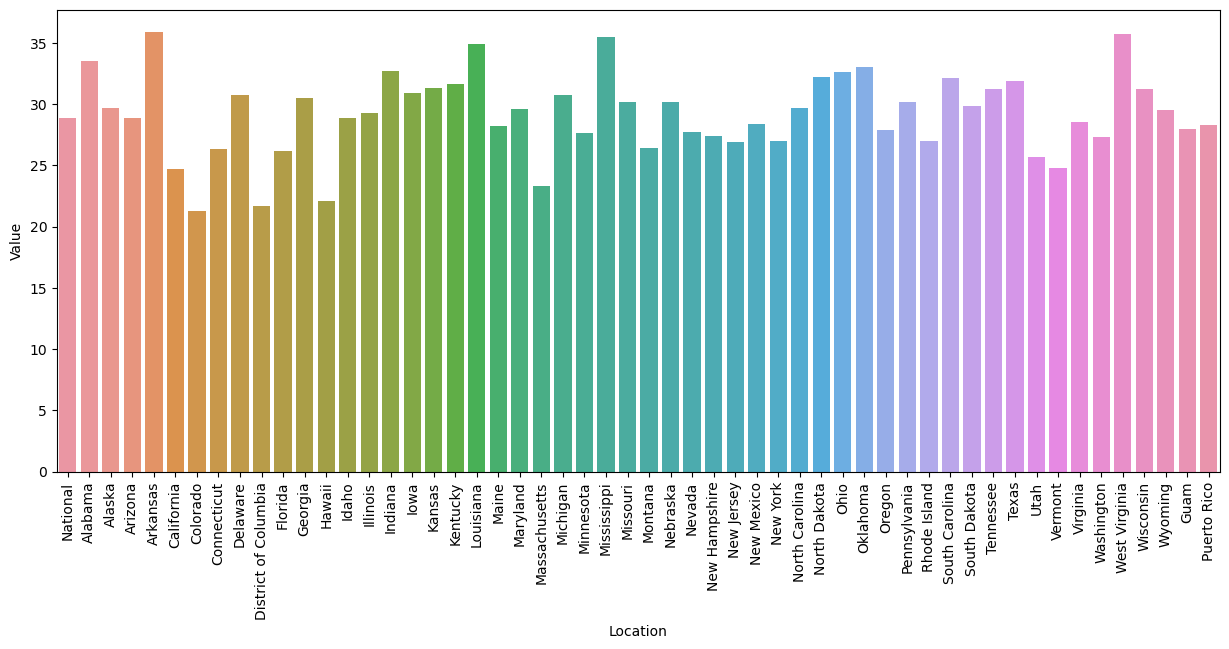

In [13]:
#Lets see values for each locations using barplot, Location on X axis and Value on Y axis
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='Value', data=adult_obesity)
plt.xticks(rotation=90)
plt.show()

In [14]:
#Check data types of the columns
adult_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     54 non-null     object 
 1   Value        54 non-null     float64
 2   95% CI       54 non-null     object 
 3   Sample Size  54 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [15]:
#convert the Sample Size into integer

adult_obesity['Sample Size'].nunique()

54

In [16]:
adult_obesity['Sample Size'].isnull().sum()

0

In [17]:
# delete all , and spaces from Sample Size column and leave only numbers
adult_obesity['Sample Size'] = adult_obesity['Sample Size'].str.replace(',', '')
adult_obesity['Sample Size'] = adult_obesity['Sample Size'].str.replace(' ', '')
#Now convert the Sample Size into integer
adult_obesity['Sample Size'] = adult_obesity['Sample Size'].astype(int)
adult_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     54 non-null     object 
 1   Value        54 non-null     float64
 2   95% CI       54 non-null     object 
 3   Sample Size  54 non-null     int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 1.6+ KB


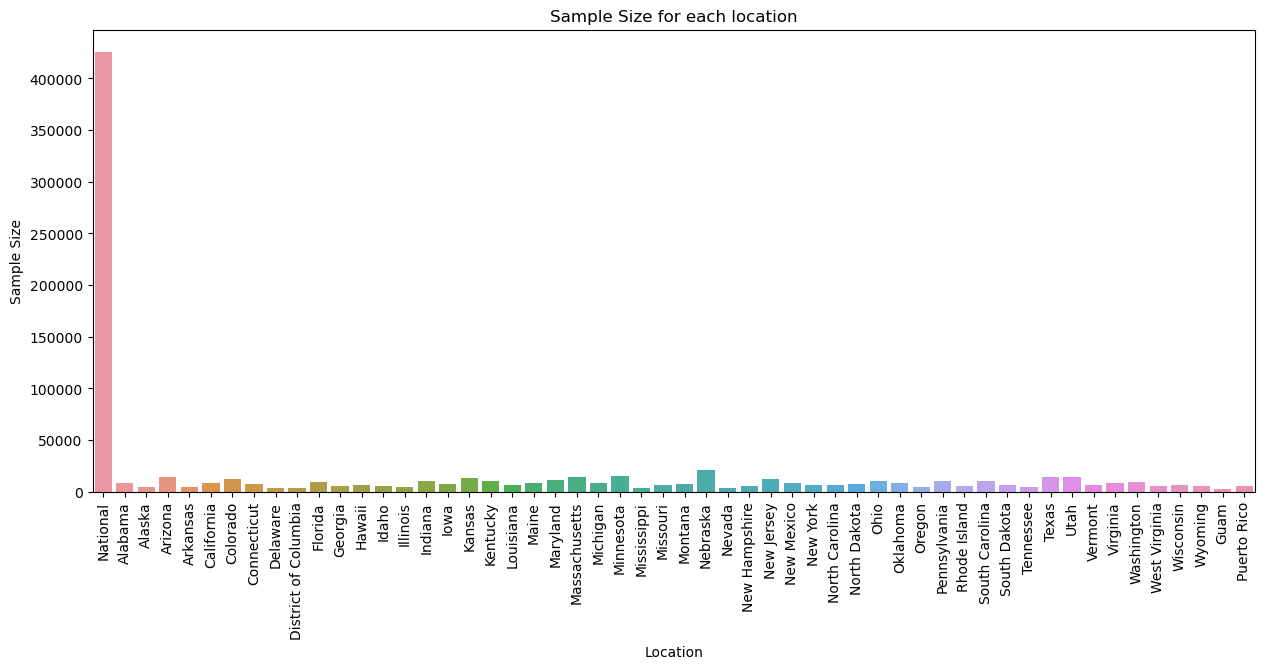

In [18]:
#Lets see values for each locations using barplot, Location on X axis and Value on Y axis
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='Sample Size', data=adult_obesity)
plt.title('Sample Size for each location')
plt.xticks(rotation=90)
plt.show()

In [19]:
adult_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     54 non-null     object 
 1   Value        54 non-null     float64
 2   95% CI       54 non-null     object 
 3   Sample Size  54 non-null     int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 1.6+ KB


In [20]:
adult_obesity["95% CI"].head()

1    (28.6-29.2)
2    (32.1-35.0)
3    (27.8-31.7)
4    (27.7-30.2)
5    (33.8-38.0)
Name: 95% CI, dtype: object

In [21]:
# In 95% CI column distribute to to two columns separeted by - . The Min values before - and Max Value after - in this given formate 28.6-29.2

# Split the 95% CI column into two columns Min and Max
adult_obesity[['Min_CI','Max_CI']] = adult_obesity['95% CI'].str.split('-',expand=True)
adult_obesity.head()

,Location,Value,95% CI,Sample Size,Min_CI,Max_CI
1,National,28.9,(28.6-29.2),425875,(28.6,29.2)
2,Alabama,33.5,(32.1-35.0),8190,(32.1,35.0)
3,Alaska,29.7,(27.8-31.7),4142,(27.8,31.7)
4,Arizona,28.9,(27.7-30.2),13849,(27.7,30.2)
5,Arkansas,35.9,(33.8-38.0),4886,(33.8,38.0)


In [22]:
#remove ( and ) from Min_CI and MAx_CI
adult_obesity['Min_CI'] = adult_obesity['Min_CI'].str.replace('(', '')
adult_obesity['Max_CI'] = adult_obesity['Max_CI'].str.replace(')', '')
adult_obesity.head()

,Location,Value,95% CI,Sample Size,Min_CI,Max_CI
1,National,28.9,(28.6-29.2),425875,28.6,29.2
2,Alabama,33.5,(32.1-35.0),8190,32.1,35.0
3,Alaska,29.7,(27.8-31.7),4142,27.8,31.7
4,Arizona,28.9,(27.7-30.2),13849,27.7,30.2
5,Arkansas,35.9,(33.8-38.0),4886,33.8,38.0


In [23]:
#Convert them into float
adult_obesity['Min_CI'] = adult_obesity['Min_CI'].astype(float)
adult_obesity['Max_CI'] = adult_obesity['Max_CI'].astype(float)
adult_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 1 to 54
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     54 non-null     object 
 1   Value        54 non-null     float64
 2   95% CI       54 non-null     object 
 3   Sample Size  54 non-null     int32  
 4   Min_CI       54 non-null     float64
 5   Max_CI       54 non-null     float64
dtypes: float64(3), int32(1), object(2)
memory usage: 2.4+ KB


In [24]:
#drop the 95% CI column and add new column having average of Min and Max
adult_obesity['Average_CI'] = (adult_obesity['Min_CI'] + adult_obesity['Max_CI'])/2
adult_obesity.head()

,Location,Value,95% CI,Sample Size,Min_CI,Max_CI,Average_CI
1,National,28.9,(28.6-29.2),425875,28.6,29.2,28.90
2,Alabama,33.5,(32.1-35.0),8190,32.1,35.0,33.55
3,Alaska,29.7,(27.8-31.7),4142,27.8,31.7,29.75
4,Arizona,28.9,(27.7-30.2),13849,27.7,30.2,28.95
5,Arkansas,35.9,(33.8-38.0),4886,33.8,38.0,35.90


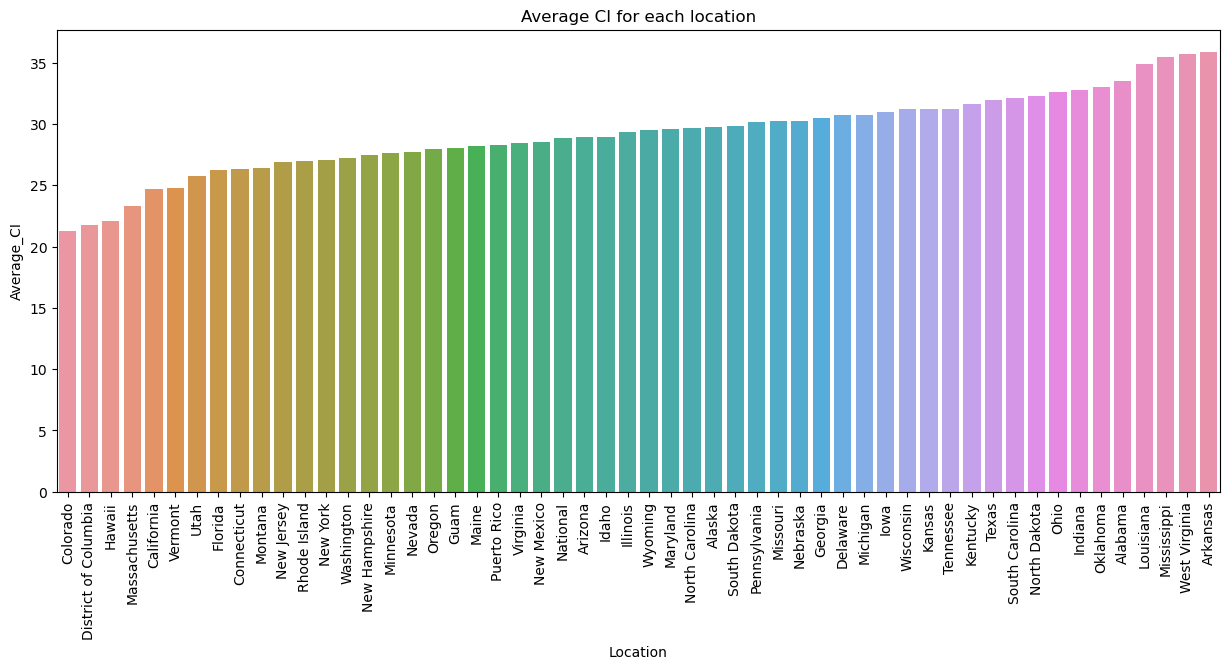

In [25]:
#plot the average CI for each location . ascending order
adult_obesity = adult_obesity.sort_values('Average_CI', ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='Average_CI', data=adult_obesity)
plt.title('Average CI for each location')
plt.xticks(rotation=90)
plt.show()

In [26]:
#Lets Explore the Nutrition Obesity data
nutrition_obesity.shape

(35042, 14)

In [27]:
#lets see the data
nutrition_obesity.head()


,YearStart,YearEnd,LocationAbbr,State,Class,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Grade,Race_Ethnicity
0,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,12.3,9.8,15.2,1526.0,NaN,NaN,NaN
1,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,7.6,5.4,10.4,831.0,Female,NaN,NaN
2,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races
3,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,10.2,7.2,14.4,885.0,NaN,NaN,Non-Hispanic White
4,2001,2001,AL,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander


In [28]:
#lets see the columns of the dataset
nutrition_obesity.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'State', 'Class', 'Question',
       'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size', 'Gender', 'Grade',
       'Race_Ethnicity'],
      dtype='object')

In [29]:
#Lets check the missing values in dataset 
missing = nutrition_obesity.isnull().sum().sort_values(ascending = False)
missing

Gender                    30036
Grade                     25030
Race_Ethnicity            17521
Data_Value                 9309
Low_Confidence_Limit       9309
High_Confidence_Limit      9309
Sample_Size                9309
YearStart                     0
YearEnd                       0
LocationAbbr                  0
State                         0
Class                         0
Question                      0
Data_Value_Type               0
dtype: int64

In [30]:
nutrition_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35042 entries, 0 to 35041
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               35042 non-null  int64  
 1   YearEnd                 35042 non-null  int64  
 2   LocationAbbr            35042 non-null  object 
 3   State                   35042 non-null  object 
 4   Class                   35042 non-null  object 
 5   Question                35042 non-null  object 
 6   Data_Value_Type         35042 non-null  object 
 7   Data_Value              25733 non-null  float64
 8   Low_Confidence_Limit    25733 non-null  float64
 9   High_Confidence_Limit   25733 non-null  float64
 10  Sample_Size             25733 non-null  float64
 11  Gender                  5006 non-null   object 
 12  Grade                   10012 non-null  object 
 13  Race_Ethnicity          17521 non-null  object 
dtypes: float64(4), int64(2), object(8)
mem

In [31]:
#Lets data value type and data value as it have no importance and we know the data is about obesity and its contains the data of obesity
nutrition_obesity = nutrition_obesity.drop("Data_Value_Type", axis = 1)
nutrition_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35042 entries, 0 to 35041
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               35042 non-null  int64  
 1   YearEnd                 35042 non-null  int64  
 2   LocationAbbr            35042 non-null  object 
 3   State                   35042 non-null  object 
 4   Class                   35042 non-null  object 
 5   Question                35042 non-null  object 
 6   Data_Value              25733 non-null  float64
 7   Low_Confidence_Limit    25733 non-null  float64
 8   High_Confidence_Limit   25733 non-null  float64
 9   Sample_Size             25733 non-null  float64
 10  Gender                  5006 non-null   object 
 11  Grade                   10012 non-null  object 
 12  Race_Ethnicity          17521 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 3.5+ MB


In [32]:
#Lets check unique values in the dataset
nutrition_obesity.nunique()


YearStart                    9
YearEnd                      9
LocationAbbr                52
State                       52
Class                        5
Question                     8
Data_Value                 672
Low_Confidence_Limit       613
High_Confidence_Limit      753
Sample_Size               4175
Gender                       2
Grade                        4
Race_Ethnicity               9
dtype: int64

In [33]:
nutrition_obesity.LocationAbbr.head()

0    AL
1    AL
2    AL
3    AL
4    AL
Name: LocationAbbr, dtype: object

In [34]:
nutrition_obesity.State.head()                       

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: State, dtype: object

In [35]:
#drop the both columns as we know that the dataset is from alabama so we rename the dataframe name and drop the columns
nutrition_obesity_albama = nutrition_obesity.drop("LocationAbbr", axis = 1)
nutrition_obesity_albama = nutrition_obesity_albama.drop("State", axis = 1)
nutrition_obesity_albama.head()

,YearStart,YearEnd,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Grade,Race_Ethnicity
0,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,12.3,9.8,15.2,1526.0,NaN,NaN,NaN
1,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,7.6,5.4,10.4,831.0,Female,NaN,NaN
2,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races
3,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,10.2,7.2,14.4,885.0,NaN,NaN,Non-Hispanic White
4,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander


In [36]:
#lets see the missing values and impute it 
nutrition_obesity_albama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35042 entries, 0 to 35041
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               35042 non-null  int64  
 1   YearEnd                 35042 non-null  int64  
 2   Class                   35042 non-null  object 
 3   Question                35042 non-null  object 
 4   Data_Value              25733 non-null  float64
 5   Low_Confidence_Limit    25733 non-null  float64
 6   High_Confidence_Limit   25733 non-null  float64
 7   Sample_Size             25733 non-null  float64
 8   Gender                  5006 non-null   object 
 9   Grade                   10012 non-null  object 
 10  Race_Ethnicity          17521 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 2.9+ MB


In [37]:
#Drop all the rows which has missing values in Data_Value
nutrition_obesity_albama = nutrition_obesity_albama.dropna(subset = ["Data_Value"])
nutrition_obesity_albama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25733 entries, 0 to 35041
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               25733 non-null  int64  
 1   YearEnd                 25733 non-null  int64  
 2   Class                   25733 non-null  object 
 3   Question                25733 non-null  object 
 4   Data_Value              25733 non-null  float64
 5   Low_Confidence_Limit    25733 non-null  float64
 6   High_Confidence_Limit   25733 non-null  float64
 7   Sample_Size             25733 non-null  float64
 8   Gender                  4940 non-null   object 
 9   Grade                   9872 non-null   object 
 10  Race_Ethnicity          8451 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 2.4+ MB


In [38]:
#Lets check number of males and females in the dataset
nutrition_obesity_albama["Gender"].value_counts()

Gender
Female    2470
Male      2470
Name: count, dtype: int64

In [39]:
nutrition_obesity_albama["Grade"].value_counts()

Grade
11th    2470
10th    2470
9th     2470
12th    2462
Name: count, dtype: int64

In [40]:
#Lets see the distribution of Race Ethics in the dataset
nutrition_obesity_albama["Race_Ethnicity"].value_counts()

Race_Ethnicity
Non-Hispanic White               2323
Hispanic                         1914
Non-Hispanic Black               1555
2 or more races                  1110
Asian                             682
American Indian/Alaska Native     569
Hawaiian/Pacific Islander         173
non-Hispanic white                 74
non-Hispanic black                 51
Name: count, dtype: int64

In [41]:

#LEts see how many total thnics in the data
nutrition_obesity_albama["Race_Ethnicity"].value_counts().sum()

8451

In [42]:
#check percentage of missing values in the dataset
missing_percentages = nutrition_obesity_albama.isnull().sum() / len(nutrition_obesity_albama) * 100
# Create a new DataFrame to store the missing value percentages
missing_df = pd.DataFrame({'Column': missing_percentages.index, 'Missing Percentage': missing_percentages.values})
# Sort the DataFrame by the missing percentage in descending order
missing_df = missing_df.sort_values('Missing Percentage', ascending=False)
missing_df

,Column,Missing Percentage
8,Gender,80.802860
10,Race_Ethnicity,67.158901
9,Grade,61.636809
0,YearStart,0.000000
1,YearEnd,0.000000
2,Class,0.000000
3,Question,0.000000
4,Data_Value,0.000000
5,Low_Confidence_Limit,0.000000
6,High_Confidence_Limit,0.000000


In [43]:
nutrition_obesity_albama.head()

,YearStart,YearEnd,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Grade,Race_Ethnicity
0,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,12.3,9.8,15.2,1526.0,NaN,NaN,NaN
1,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,7.6,5.4,10.4,831.0,Female,NaN,NaN
3,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,10.2,7.2,14.4,885.0,NaN,NaN,Non-Hispanic White
6,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,16.2,13.3,19.5,523.0,NaN,NaN,Non-Hispanic Black
9,2001,2001,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,13.6,8.5,21.1,256.0,NaN,12th,NaN


In [44]:
#Lets drop the missing values in gender column
nutrition_obesity_albama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25733 entries, 0 to 35041
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               25733 non-null  int64  
 1   YearEnd                 25733 non-null  int64  
 2   Class                   25733 non-null  object 
 3   Question                25733 non-null  object 
 4   Data_Value              25733 non-null  float64
 5   Low_Confidence_Limit    25733 non-null  float64
 6   High_Confidence_Limit   25733 non-null  float64
 7   Sample_Size             25733 non-null  float64
 8   Gender                  4940 non-null   object 
 9   Grade                   9872 non-null   object 
 10  Race_Ethnicity          8451 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 2.4+ MB


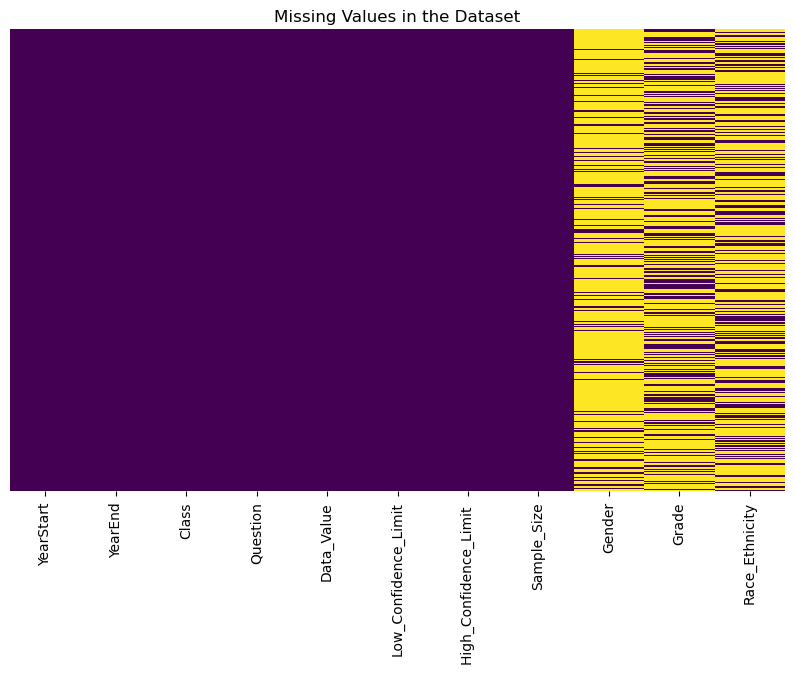

In [45]:
#LEts plot the graphs for missing valus 
plt.figure(figsize=(10, 6))
sns.heatmap(nutrition_obesity_albama.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()


In [46]:
#Lets check the value counts of Gender
nutrition_obesity_albama["Gender"].value_counts()

Gender
Female    2470
Male      2470
Name: count, dtype: int64

In [47]:
#Lets encode the Object column
# Obesity / Weight Status    with 1
# Fruits and Vegetables     with 2
# Physical Activity         with 3
# Television Viewing         with 4
# Sugar Drinks                with 5

# Create a mapping dictionary
encoding_mapping = {
    'Obesity / Weight Status': 1,
    'Fruits and Vegetables': 2,
    'Physical Activity': 3,
    'Television Viewing': 4,
    'Sugar Drinks': 5
}

# Map the categories to their corresponding encoded values
nutrition_obesity_albama['Class'] = nutrition_obesity_albama['Class'].map(encoding_mapping)



In [48]:
nutrition_obesity_albama.Class.value_counts()

Class
1    7312
2    6579
3    5809
4    3466
5    2567
Name: count, dtype: int64

In [49]:
#Lets encode male and female 
label_encoder = LabelEncoder()
encoding_mapping = { "Male" : 1,
                    "Female" : 2}
# Map the categories to their corresponding encoded values
nutrition_obesity_albama['Gender'] = nutrition_obesity_albama['Gender'].map(encoding_mapping)


nutrition_obesity_albama.Gender.value_counts()


Gender
2.0    2470
1.0    2470
Name: count, dtype: int64

In [50]:
nutrition_obesity_albama["Race_Ethnicity"].value_counts()

Race_Ethnicity
Non-Hispanic White               2323
Hispanic                         1914
Non-Hispanic Black               1555
2 or more races                  1110
Asian                             682
American Indian/Alaska Native     569
Hawaiian/Pacific Islander         173
non-Hispanic white                 74
non-Hispanic black                 51
Name: count, dtype: int64

In [51]:

# Create a mapping dictionary
encoding_mapping = {
    'Non-Hispanic White': 1,
    'Hispanic': 2,
    'Non-Hispanic Black': 3,
    '2 or more races': 4,
    'Asian': 5,
    'American Indian/Alaska Native': 6,
    'Hawaiian/Pacific Islander': 7,
    'non-Hispanic white': 8,
    'non-Hispanic black': 9
}

# Map the groups to their corresponding encoded values
nutrition_obesity_albama['Race_Ethnicity'] = nutrition_obesity_albama['Race_Ethnicity'].map(encoding_mapping)

nutrition_obesity_albama.Race_Ethnicity.value_counts()

Race_Ethnicity
1.0    2323
2.0    1914
3.0    1555
4.0    1110
5.0     682
6.0     569
7.0     173
8.0      74
9.0      51
Name: count, dtype: int64

In [52]:

nutrition_obesity_albama.Grade.value_counts()

Grade
11th    2470
10th    2470
9th     2470
12th    2462
Name: count, dtype: int64

In [53]:
nutrition_obesity_albama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25733 entries, 0 to 35041
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               25733 non-null  int64  
 1   YearEnd                 25733 non-null  int64  
 2   Class                   25733 non-null  int64  
 3   Question                25733 non-null  object 
 4   Data_Value              25733 non-null  float64
 5   Low_Confidence_Limit    25733 non-null  float64
 6   High_Confidence_Limit   25733 non-null  float64
 7   Sample_Size             25733 non-null  float64
 8   Gender                  4940 non-null   float64
 9   Grade                   9872 non-null   object 
 10  Race_Ethnicity          8451 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.4+ MB


In [54]:

# Create a mapping dictionary
encoding_mapping = {
    '11th': 1,
    '10th': 2,
    '9th': 3,
    '12th': 4
}

# Map the values to their corresponding encoded values
nutrition_obesity_albama['Grade'] = nutrition_obesity_albama['Grade'].map(encoding_mapping)
nutrition_obesity_albama['Grade'].value_counts()

Grade
1.0    2470
2.0    2470
3.0    2470
4.0    2462
Name: count, dtype: int64

In [55]:
nutrition_obesity_albama['Question'].value_counts()

Question
Percent of students in grades 9-12 who have obesity                                                                            3656
Percent of students in grades 9-12 who have an overweight classification                                                       3656
Percent of students in grades 9-12 watching 3 or more hours of television each school day                                      3466
Percent of students in grades 9-12 who consume fruit less than 1 time daily                                                    3435
Percent of students in grades 9-12 who participate in daily physical education                                                 3326
Percent of students in grades 9-12 who consume vegetables less than 1 time daily                                               3144
Percent of students in grades 9-12 who drank regular soda/pop at least one time per day                                        2567
Percent of students in grades 9-12 who achieve 1 hour or more of mo

In [56]:

# Create a mapping dictionary
encoding_mapping = {
    'Percent of students in grades 9-12 who have obesity': 1,
    'Percent of students in grades 9-12 who have an overweight classification': 2,
    'Percent of students in grades 9-12 watching 3 or more hours of television each school day': 3,
    'Percent of students in grades 9-12 who consume fruit less than 1 time daily': 4,
    'Percent of students in grades 9-12 who participate in daily physical education': 5,
    'Percent of students in grades 9-12 who consume vegetables less than 1 time daily': 6,
    'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day': 7,
    'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily': 8
}

# Map the values to their corresponding encoded values
nutrition_obesity_albama['Question'] = nutrition_obesity_albama['Question'].map(encoding_mapping)
nutrition_obesity_albama['Question'].value_counts()

Question
1    3656
2    3656
3    3466
4    3435
5    3326
6    3144
7    2567
8    2483
Name: count, dtype: int64

In [57]:
nutrition_obesity_albama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25733 entries, 0 to 35041
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               25733 non-null  int64  
 1   YearEnd                 25733 non-null  int64  
 2   Class                   25733 non-null  int64  
 3   Question                25733 non-null  int64  
 4   Data_Value              25733 non-null  float64
 5   Low_Confidence_Limit    25733 non-null  float64
 6   High_Confidence_Limit   25733 non-null  float64
 7   Sample_Size             25733 non-null  float64
 8   Gender                  4940 non-null   float64
 9   Grade                   9872 non-null   float64
 10  Race_Ethnicity          8451 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 2.4 MB


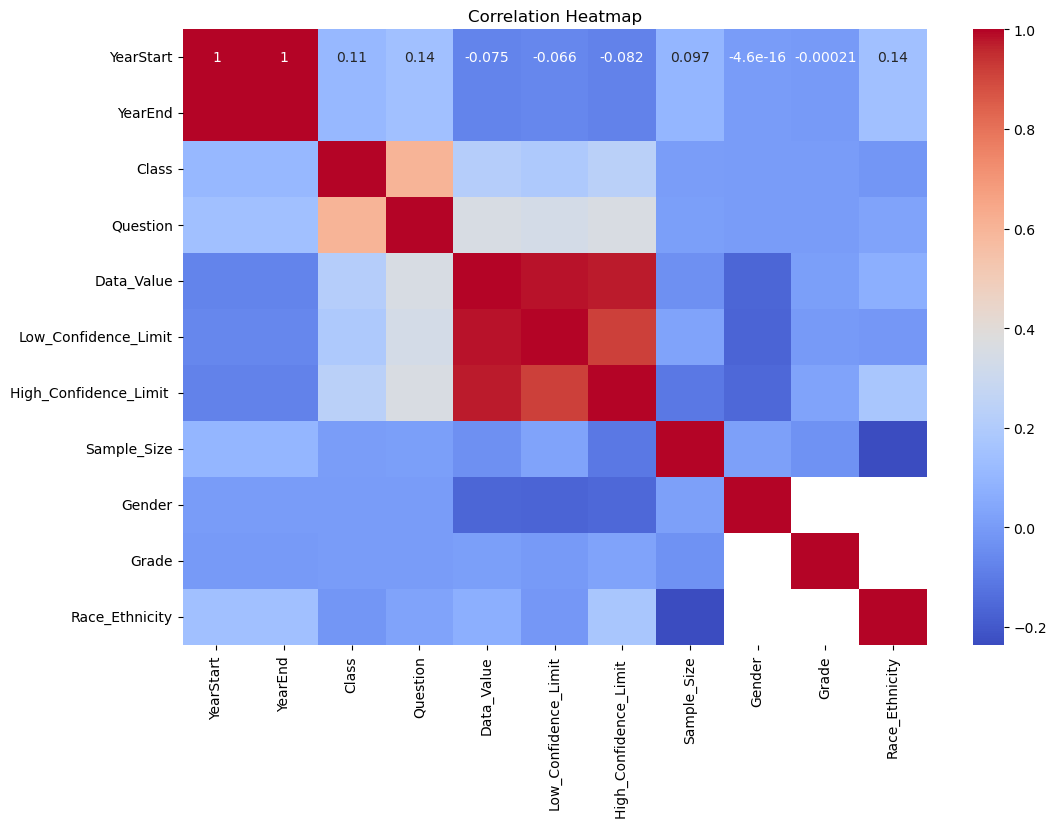

In [58]:
#Lets find the correelation of the dataset
correlation = nutrition_obesity_albama.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [59]:
#Lets check missing values now
missing = nutrition_obesity_albama.isnull().sum().sort_values(ascending = False)
missing

Gender                    20793
Race_Ethnicity            17282
Grade                     15861
YearStart                     0
YearEnd                       0
Class                         0
Question                      0
Data_Value                    0
Low_Confidence_Limit          0
High_Confidence_Limit         0
Sample_Size                   0
dtype: int64

In [60]:
#LEts check grades counts 
nutrition_obesity_albama.Grade.value_counts()


Grade
1.0    2470
2.0    2470
3.0    2470
4.0    2462
Name: count, dtype: int64

In [61]:
nutrition_obesity_albama_clean = nutrition_obesity_albama.drop(["Gender", "Race_Ethnicity", "Grade"], axis=1)
nutrition_obesity_albama_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25733 entries, 0 to 35041
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               25733 non-null  int64  
 1   YearEnd                 25733 non-null  int64  
 2   Class                   25733 non-null  int64  
 3   Question                25733 non-null  int64  
 4   Data_Value              25733 non-null  float64
 5   Low_Confidence_Limit    25733 non-null  float64
 6   High_Confidence_Limit   25733 non-null  float64
 7   Sample_Size             25733 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.8 MB


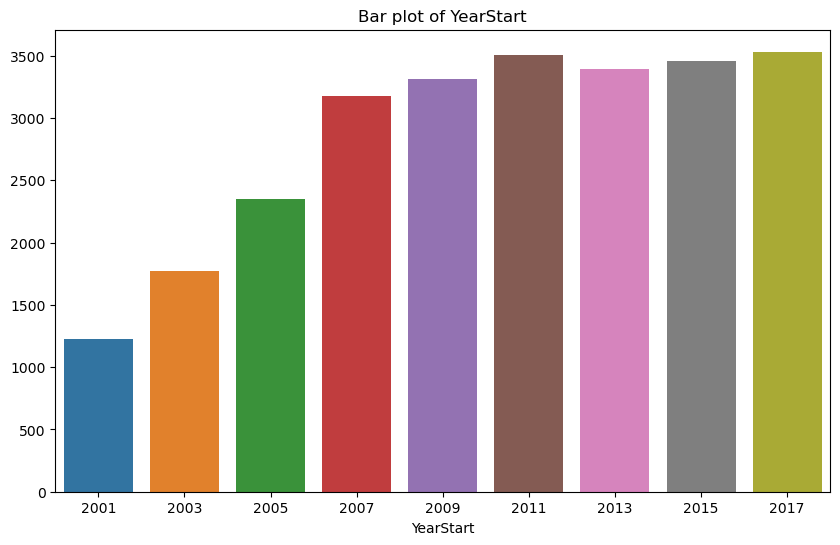

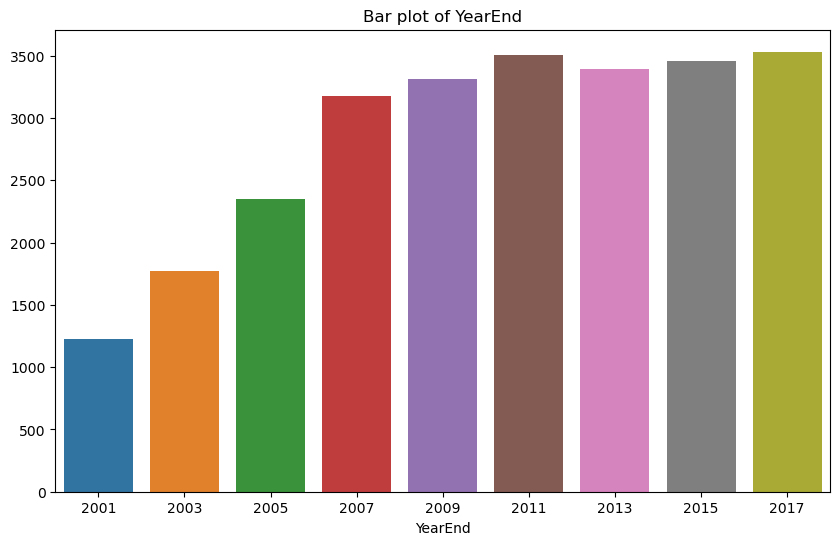

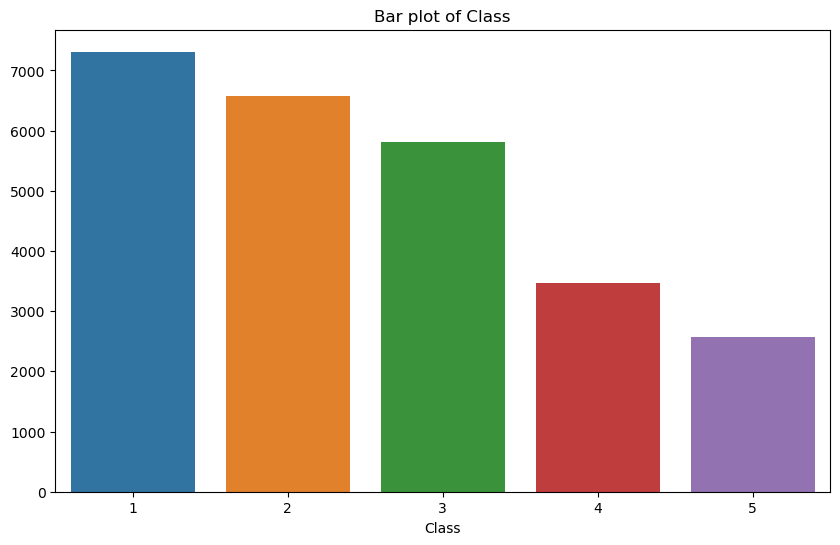

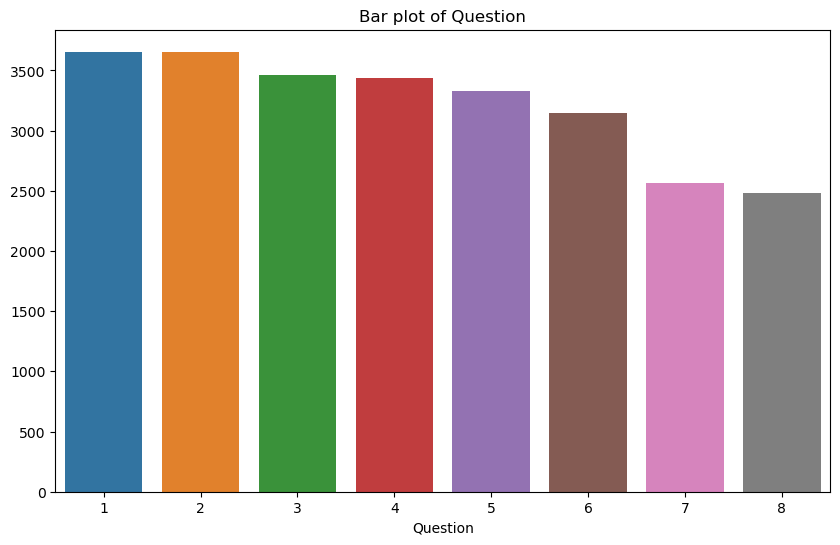

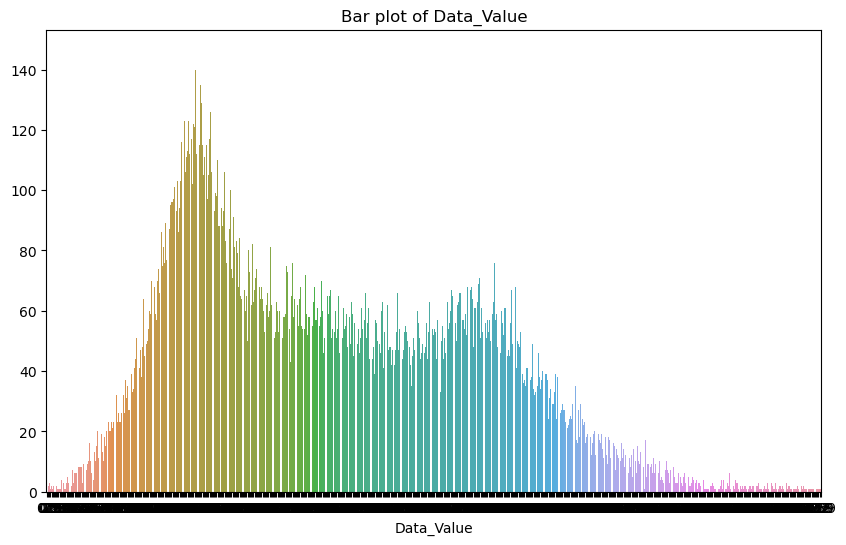

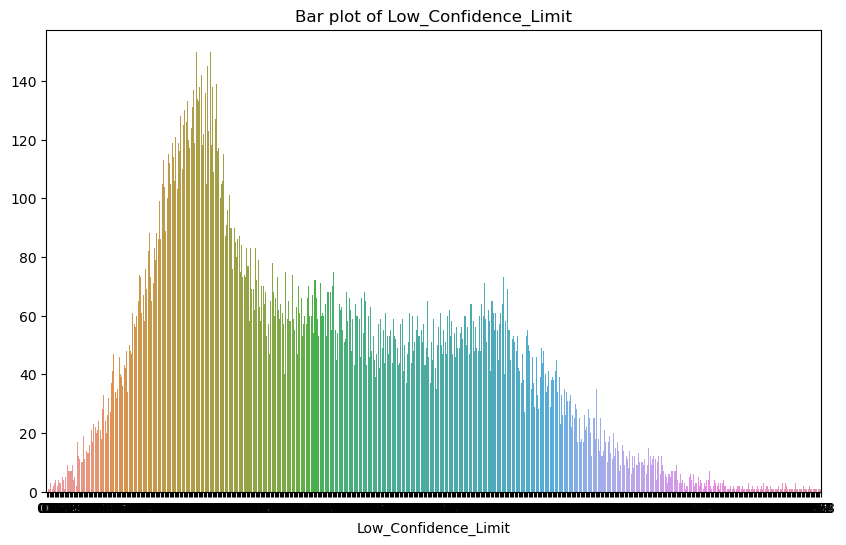

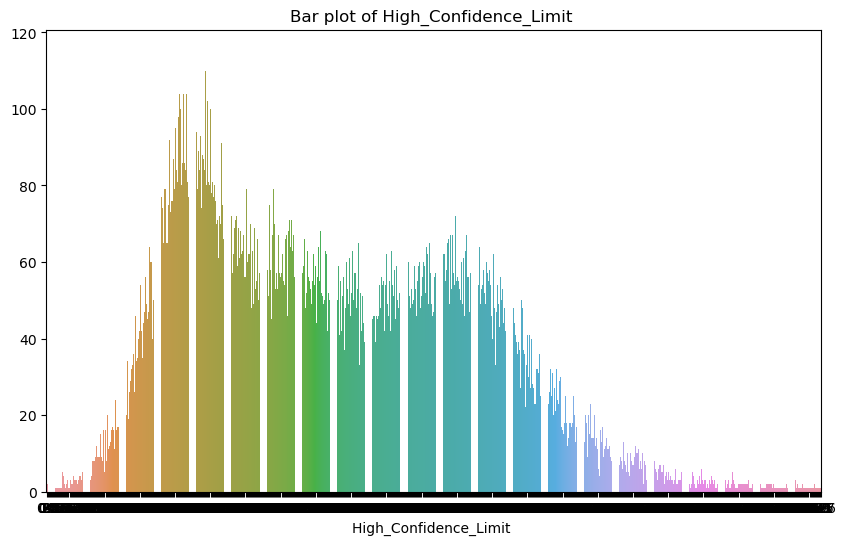

In [62]:
#Let Visualize the data 
#itterate through complete data set and make its bar plot 

for i in nutrition_obesity_albama_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=nutrition_obesity_albama_clean[i].value_counts().index, y=nutrition_obesity_albama_clean[i].value_counts().values)
    plt.title(f'Bar plot of {i}')
    plt.show()


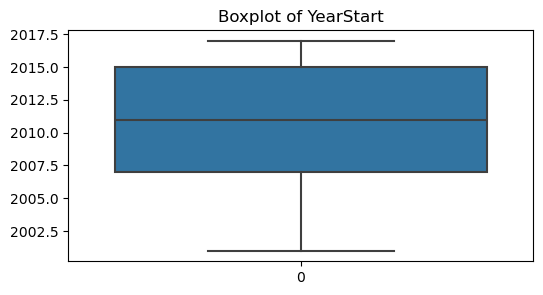

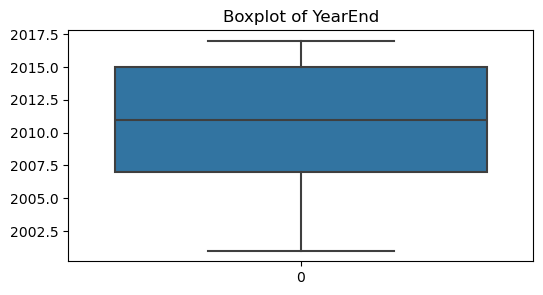

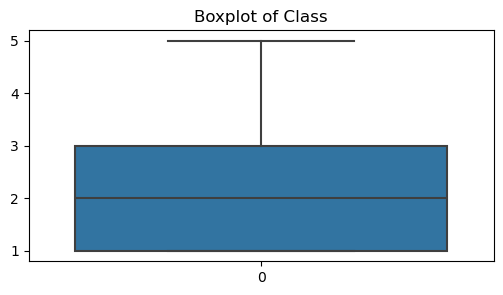

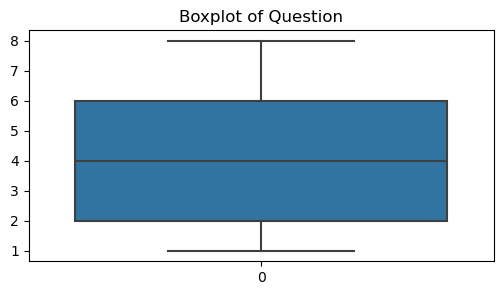

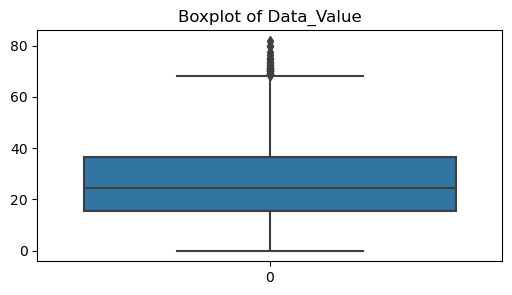

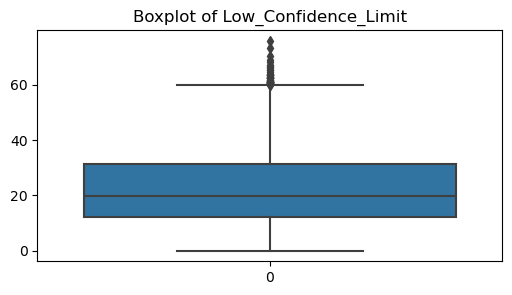

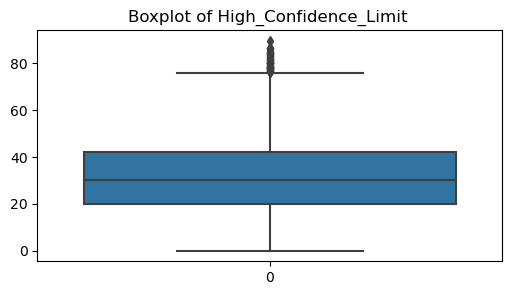

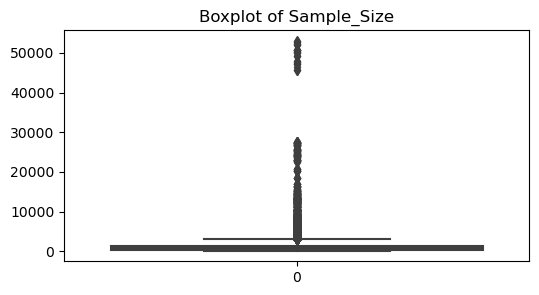

In [ ]:
#Lets iterate through all the columns and make boxplot of the dataset
for i in nutrition_obesity_albama_clean.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(nutrition_obesity_albama_clean[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [ ]:
#As we know that the dataset has outliers espcially in the data value and upper and lower limit column so we remove tbe outliers by IQR method
# Calculate the first quartile
Q1 = nutrition_obesity_albama_clean.quantile(0.25)
# Calculate the third quartile
Q3 = nutrition_obesity_albama_clean.quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Remove the outliers
nutrition_obesity_albama_clean = nutrition_obesity_albama_clean[~((nutrition_obesity_albama_clean < (Q1 - 1.5 * IQR)) | (nutrition_obesity_albama_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
# Display the number of rows and columns after removing the outliers
nutrition_obesity_albama_clean.shape

(23406, 8)

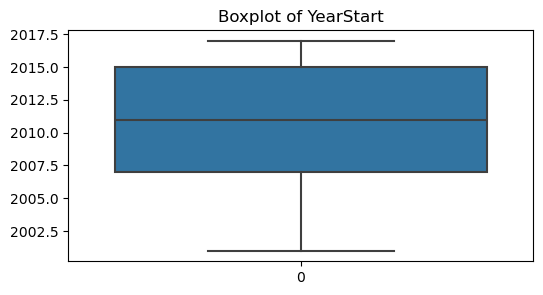

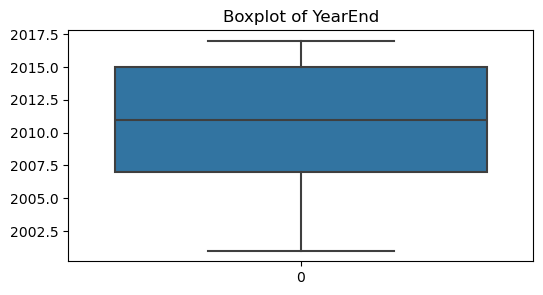

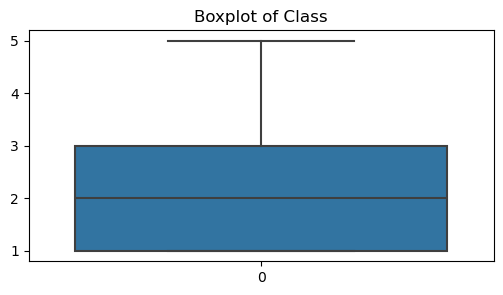

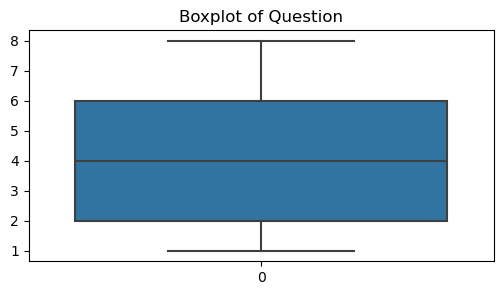

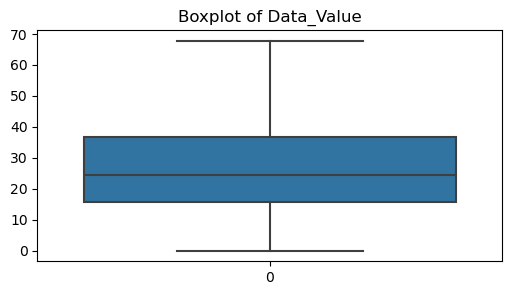

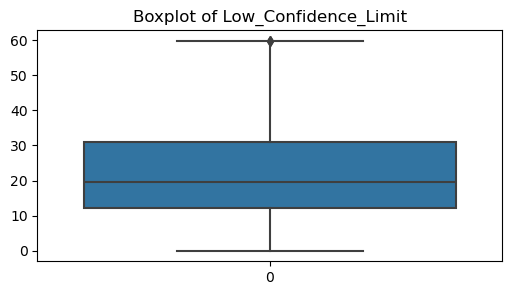

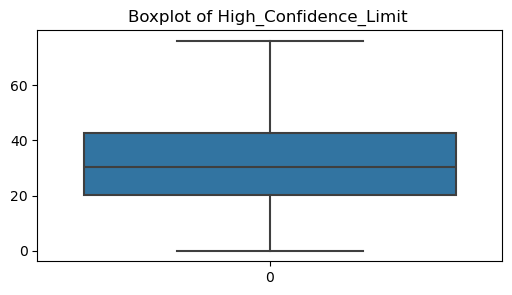

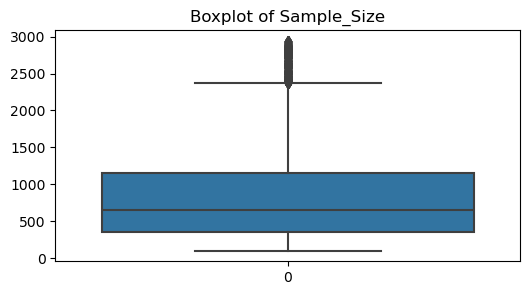

In [ ]:
#Lets iterate through all the columns and make boxplot of the dataset
for i in nutrition_obesity_albama_clean.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(nutrition_obesity_albama_clean[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [ ]:
nutrition_obesity_albama_clean.head()

,YearStart,YearEnd,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,2001,2001,1,1,12.3,9.8,15.2,1526.0
1,2001,2001,1,1,7.6,5.4,10.4,831.0
3,2001,2001,1,1,10.2,7.2,14.4,885.0
6,2001,2001,1,1,16.2,13.3,19.5,523.0
9,2001,2001,1,1,13.6,8.5,21.1,256.0


In [ ]:
# to a very maximum extent we have removed the outliers from the dataset
#Now lets scaled the dataset using the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
nutrition_obesity_albama_scaled = scaler.fit_transform(nutrition_obesity_albama_clean)
# Create a new DataFrame with the scaled data
nutrition_obesity_albama_scaled = pd.DataFrame(nutrition_obesity_albama_scaled, columns=nutrition_obesity_albama_clean.columns)
# Display the first five rows of the scaled data
nutrition_obesity_albama_scaled.head()


,YearStart,YearEnd,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,0.0,0.0,0.0,0.0,0.181416,0.163880,0.200000,0.501406
1,0.0,0.0,0.0,0.0,0.112094,0.090301,0.136842,0.257032
2,0.0,0.0,0.0,0.0,0.150442,0.120401,0.189474,0.276020
3,0.0,0.0,0.0,0.0,0.238938,0.222408,0.256579,0.148734
4,0.0,0.0,0.0,0.0,0.200590,0.142140,0.277632,0.054852


In [ ]:
nutrition_obesity_albama_clean.columns

Index(['YearStart', 'YearEnd', 'Class', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size'],
      dtype='object')

In [ ]:
nutrition_obesity_albama_clean.head()

,YearStart,YearEnd,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,2001,2001,1,1,12.3,9.8,15.2,1526.0
1,2001,2001,1,1,7.6,5.4,10.4,831.0
3,2001,2001,1,1,10.2,7.2,14.4,885.0
6,2001,2001,1,1,16.2,13.3,19.5,523.0
9,2001,2001,1,1,13.6,8.5,21.1,256.0


In [ ]:
nutrition_obesity_albama_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23406 entries, 0 to 35041
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               23406 non-null  int64  
 1   YearEnd                 23406 non-null  int64  
 2   Class                   23406 non-null  int64  
 3   Question                23406 non-null  int64  
 4   Data_Value              23406 non-null  float64
 5   Low_Confidence_Limit    23406 non-null  float64
 6   High_Confidence_Limit   23406 non-null  float64
 7   Sample_Size             23406 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.1 MB


In [ ]:
#Lets make copy of nutrition_obesity_albama_clean

nutrition_obesity_albama_clean_avg      = nutrition_obesity_albama_clean.copy()
# lets make new dataframe haveing average values of the columns
nutrition_obesity_albama_clean_avg["Average"] = nutrition_obesity_albama_clean_avg.mean(axis=1)
nutrition_obesity_albama_clean_avg.head()

,YearStart,YearEnd,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Average
0,2001,2001,1,1,12.3,9.8,15.2,1526.0,695.9125
1,2001,2001,1,1,7.6,5.4,10.4,831.0,607.3000
3,2001,2001,1,1,10.2,7.2,14.4,885.0,615.1000
6,2001,2001,1,1,16.2,13.3,19.5,523.0,572.0000
9,2001,2001,1,1,13.6,8.5,21.1,256.0,537.9000


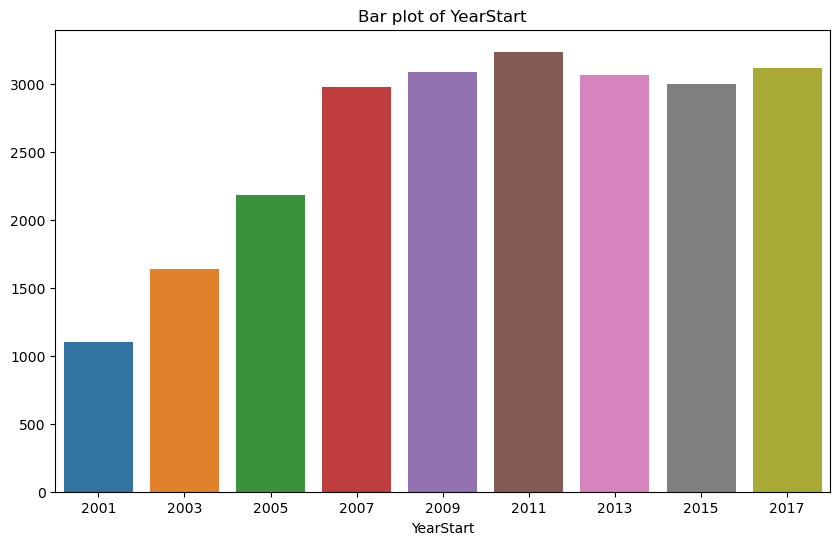

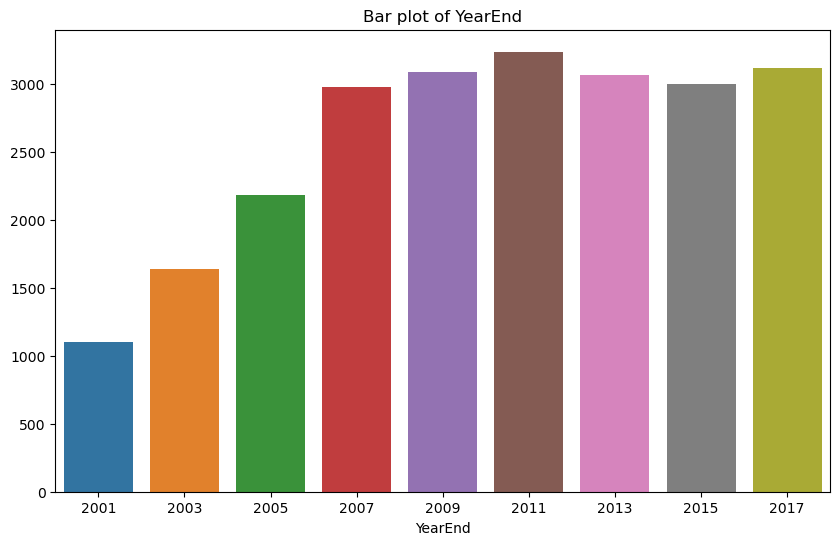

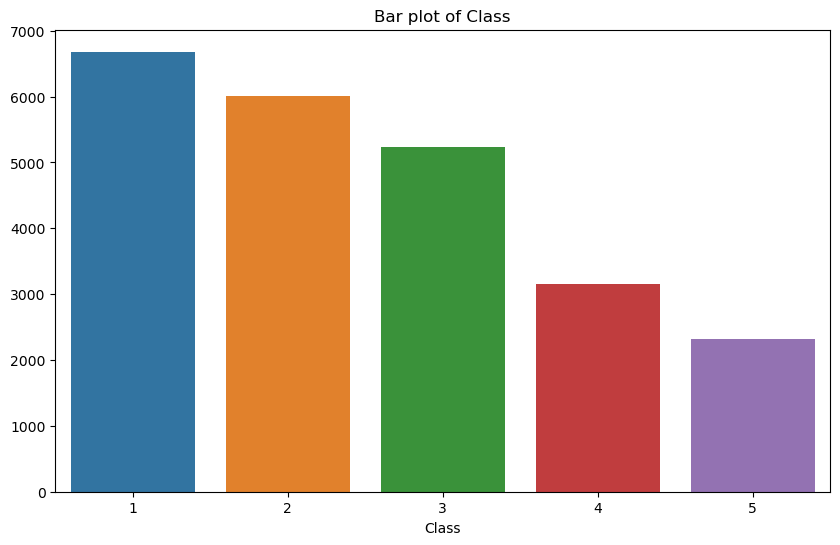

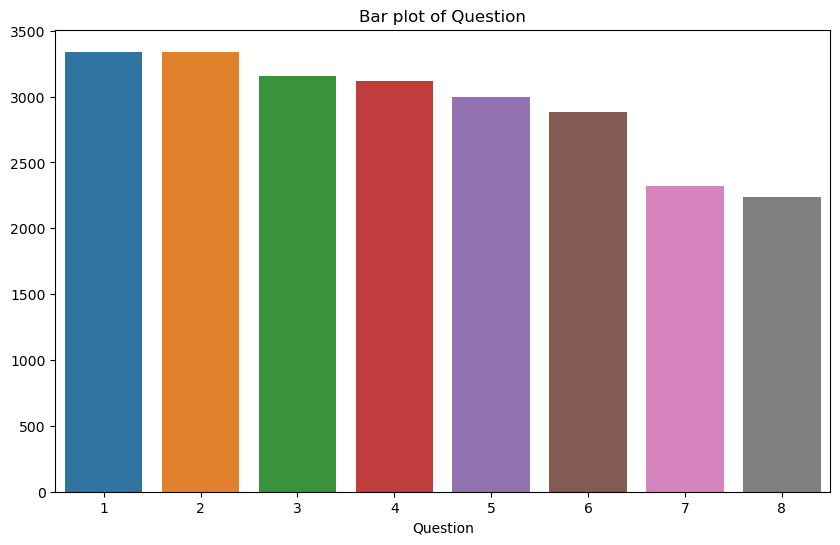

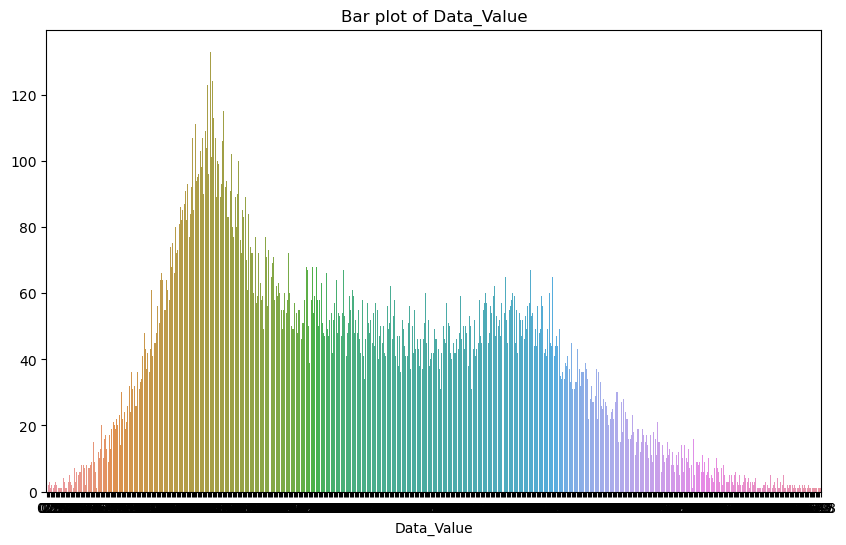

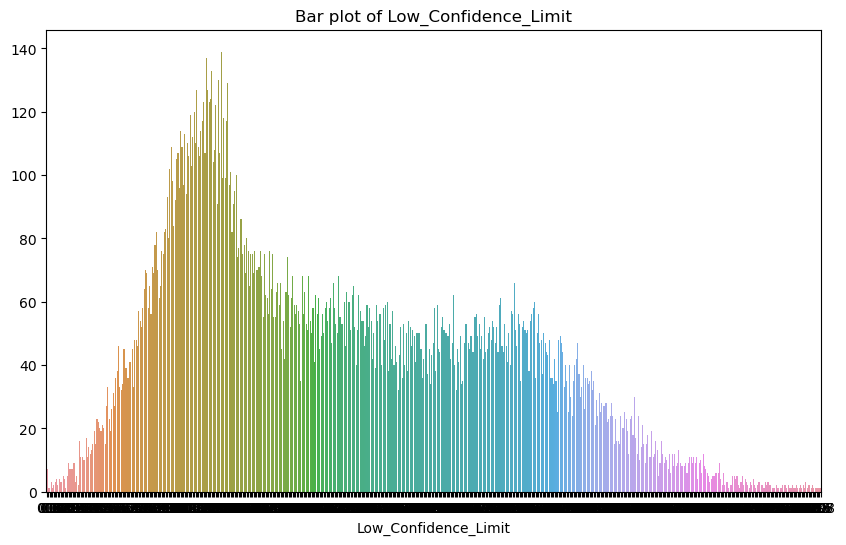

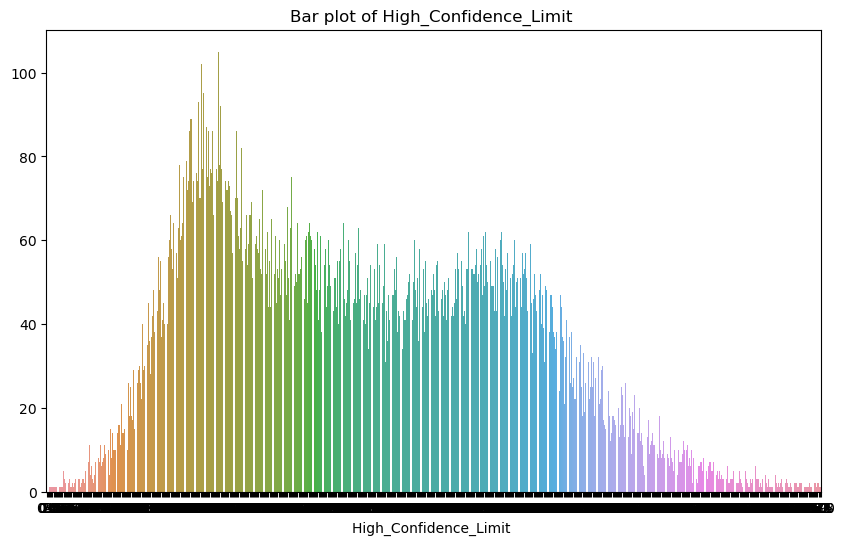

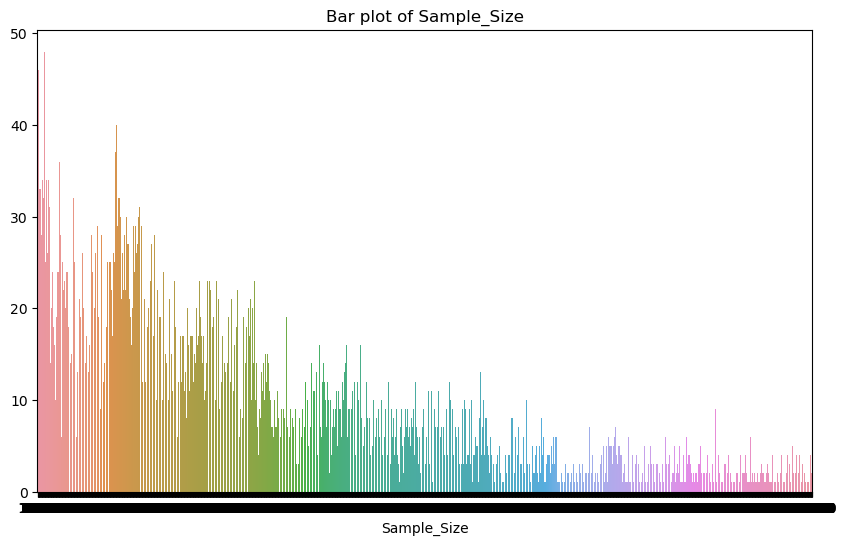

KeyboardInterrupt: 

In [448]:
for i in nutrition_obesity_albama_clean_avg.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=nutrition_obesity_albama_clean_avg["Class"], y=nutrition_obesity_albama_clean_avg["Average"])
    plt.show()

In [412]:
#Lets split the data into features and target
X = nutrition_obesity_albama_clean.drop("Data_Value", axis = 1)
y = nutrition_obesity_albama_clean["Data_Value"]
random_state = 42

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
# Display the number of rows and columns in the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18724, 7), (4682, 7), (18724,), (4682,))

In [413]:
#Lets apply the regression Problem
# Create a Linear Regression model
linear_regression = LinearRegression()
# Fit the model on the training data
linear_regression.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = linear_regression.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
# Display the mean squared error and R-squared value
mse, r2

(0.12284247334327313, 0.9992192140792115)

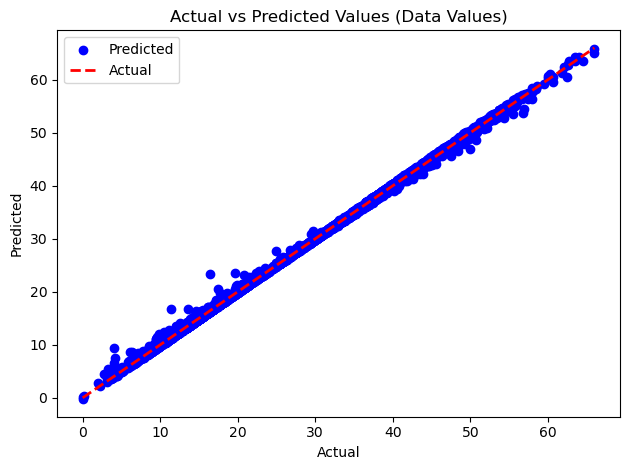

Root Mean Squared Error : 0.35048890616291
R_Squared Value : 0.9992192140792115


In [414]:

# Create a Linear Regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_regression.predict(X_test)

# Calculate the root mean squared error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Data Values)')
plt.legend(['Predicted', 'Actual', 'Predicted'])

# Show the plot
plt.tight_layout()
plt.show()

# Display the root mean squared error and R-squared value
print(f"Root Mean Squared Error : {rmse}")
print(f"R_Squared Value : {r2}")

In [415]:
wt_obesity.columns

Index(['unit', 'classification1', 'demographic_group', 'year', 'estimate',
       'grade 1 obesity (bmi from 30.0 to 34.9)',
       'grade 2 obesity (bmi from 35.0 to 39.9)',
       'grade 3 obesity (bmi greater than or equal to 40.0)',
       'normal weight (bmi from 18.5 to 24.9)',
       'obesity (bmi greater than or equal to 30.0)',
       'overweight or obese (bmi greater than or equal to 25.0)',
       'age_20-34 years', 'age_35-44 years', 'age_45-54 years',
       'age_55-64 years', 'age_65-74 years', 'age_75 years and over'],
      dtype='object')

In [416]:
#Lets import weight obesity
wt_obesity = pd.read_csv("Wt_Obesity.csv")
wt_obesity.head()

,unit,classification1,demographic_group,year,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over
0,"Percent of population, age-adjusted",Total,20 years and over,1988-1994,41.6,0,0,0,1,0,0,0,0,0,0,0,0
1,"Percent of population, age-adjusted",Total,20 years and over,1999-2002,33.0,0,0,0,1,0,0,0,0,0,0,0,0
2,"Percent of population, age-adjusted",Total,20 years and over,2001-2004,32.3,0,0,0,1,0,0,0,0,0,0,0,0
3,"Percent of population, age-adjusted",Total,20 years and over,2003-2006,31.6,0,0,0,1,0,0,0,0,0,0,0,0
4,"Percent of population, age-adjusted",Total,20 years and over,2005-2008,30.8,0,0,0,1,0,0,0,0,0,0,0,0


In [417]:
wt_obesity.shape

(2899, 17)

In [418]:
wt_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 17 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   unit                                                     2899 non-null   object 
 1   classification1                                          2899 non-null   object 
 2   demographic_group                                        2899 non-null   object 
 3   year                                                     2899 non-null   object 
 4   estimate                                                 2899 non-null   float64
 5   grade 1 obesity (bmi from 30.0 to 34.9)                  2899 non-null   int64  
 6   grade 2 obesity (bmi from 35.0 to 39.9)                  2899 non-null   int64  
 7   grade 3 obesity (bmi greater than or equal to 40.0)      2899 non-null   int64  
 8   normal weight (bmi from 18.5

In [419]:
#Lets check unique values in the dataset
wt_obesity.nunique()

unit                                                         2
classification1                                              6
demographic_group                                           34
year                                                        10
estimate                                                   708
grade 1 obesity (bmi from 30.0 to 34.9)                      2
grade 2 obesity (bmi from 35.0 to 39.9)                      2
grade 3 obesity (bmi greater than or equal to 40.0)          2
normal weight (bmi from 18.5 to 24.9)                        2
obesity (bmi greater than or equal to 30.0)                  2
overweight or obese (bmi greater than or equal to 25.0)      2
age_20-34 years                                              2
age_35-44 years                                              2
age_45-54 years                                              2
age_55-64 years                                              2
age_65-74 years                                        

In [420]:
#Apply encoding to the unit column 
le = LabelEncoder()
wt_obesity["unit"] = le.fit_transform(wt_obesity["unit"])
wt_obesity["unit"].value_counts()


unit
1    1800
0    1099
Name: count, dtype: int64

In [421]:
#apply to the classification1 column
wt_obesity["classification1"] = le.fit_transform(wt_obesity["classification1"])
wt_obesity["classification1"].value_counts()

classification1
4    905
3    700
0    480
1    454
2    240
5    120
Name: count, dtype: int64

In [422]:
wt_obesity["unit"].value_counts()


unit
1    1800
0    1099
Name: count, dtype: int64

In [423]:
wt_obesity.year.head()

0    1988-1994
1    1999-2002
2    2001-2004
3    2003-2006
4    2005-2008
Name: year, dtype: object

In [424]:
# Extract start year and end year from the "year" column
wt_obesity[['start_year', 'end_year']] = wt_obesity['year'].str.split('-', expand=True)

# Convert start year and end year columns to integer type
wt_obesity['start_year'] = wt_obesity['start_year'].astype(int)
wt_obesity['end_year'] = wt_obesity['end_year'].astype(int)

# Display the updated DataFrame
wt_obesity.head()

,unit,classification1,demographic_group,year,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over,start_year,end_year
0,0,5,20 years and over,1988-1994,41.6,0,0,0,1,0,0,0,0,0,0,0,0,1988,1994
1,0,5,20 years and over,1999-2002,33.0,0,0,0,1,0,0,0,0,0,0,0,0,1999,2002
2,0,5,20 years and over,2001-2004,32.3,0,0,0,1,0,0,0,0,0,0,0,0,2001,2004
3,0,5,20 years and over,2003-2006,31.6,0,0,0,1,0,0,0,0,0,0,0,0,2003,2006
4,0,5,20 years and over,2005-2008,30.8,0,0,0,1,0,0,0,0,0,0,0,0,2005,2008


In [425]:
#Now drop the year column 
wt_obesity = wt_obesity.drop("year", axis = 1)
wt_obesity.head()

,unit,classification1,demographic_group,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over,start_year,end_year
0,0,5,20 years and over,41.6,0,0,0,1,0,0,0,0,0,0,0,0,1988,1994
1,0,5,20 years and over,33.0,0,0,0,1,0,0,0,0,0,0,0,0,1999,2002
2,0,5,20 years and over,32.3,0,0,0,1,0,0,0,0,0,0,0,0,2001,2004
3,0,5,20 years and over,31.6,0,0,0,1,0,0,0,0,0,0,0,0,2003,2006
4,0,5,20 years and over,30.8,0,0,0,1,0,0,0,0,0,0,0,0,2005,2008


In [426]:
#Apply the label encoder to demographic_group
wt_obesity["demographic_group"] = le.fit_transform(wt_obesity["demographic_group"])
wt_obesity["demographic_group"].value_counts()


demographic_group
1     120
15    120
3     120
2     120
0     120
13    120
19    120
18    120
4     120
5     120
29    120
33    120
30    120
32    120
16    120
27    119
12     60
26     60
6      60
17     60
10     60
9      60
20     60
8      60
7      60
21     59
22     59
23     59
11     57
24     57
25     49
14     34
31     34
28     32
Name: count, dtype: int64

In [427]:
wt_obesity.head()

,unit,classification1,demographic_group,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over,start_year,end_year
0,0,5,1,41.6,0,0,0,1,0,0,0,0,0,0,0,0,1988,1994
1,0,5,1,33.0,0,0,0,1,0,0,0,0,0,0,0,0,1999,2002
2,0,5,1,32.3,0,0,0,1,0,0,0,0,0,0,0,0,2001,2004
3,0,5,1,31.6,0,0,0,1,0,0,0,0,0,0,0,0,2003,2006
4,0,5,1,30.8,0,0,0,1,0,0,0,0,0,0,0,0,2005,2008


In [428]:
wt_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   unit                                                     2899 non-null   int32  
 1   classification1                                          2899 non-null   int32  
 2   demographic_group                                        2899 non-null   int32  
 3   estimate                                                 2899 non-null   float64
 4   grade 1 obesity (bmi from 30.0 to 34.9)                  2899 non-null   int64  
 5   grade 2 obesity (bmi from 35.0 to 39.9)                  2899 non-null   int64  
 6   grade 3 obesity (bmi greater than or equal to 40.0)      2899 non-null   int64  
 7   normal weight (bmi from 18.5 to 24.9)                    2899 non-null   int64  
 8   obesity (bmi greater than or

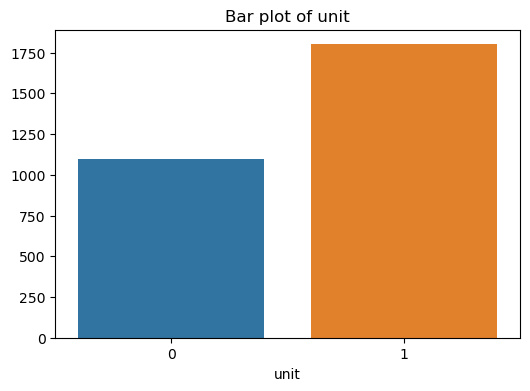

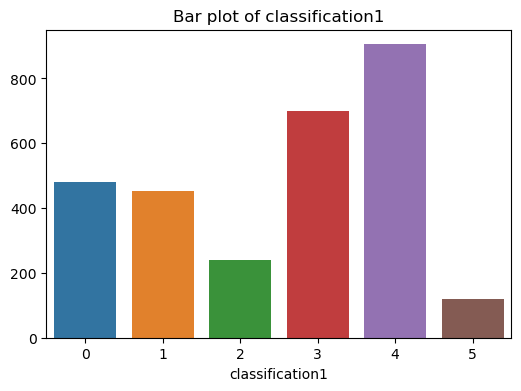

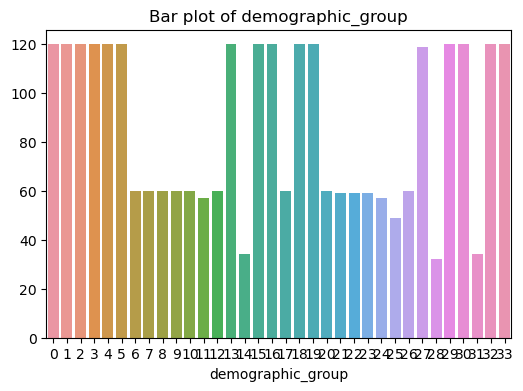

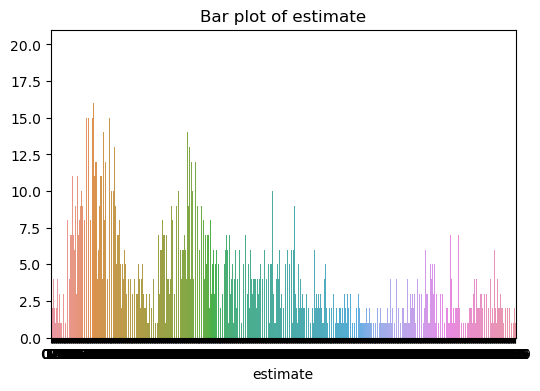

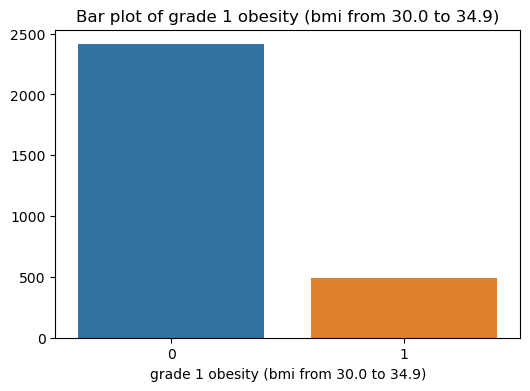

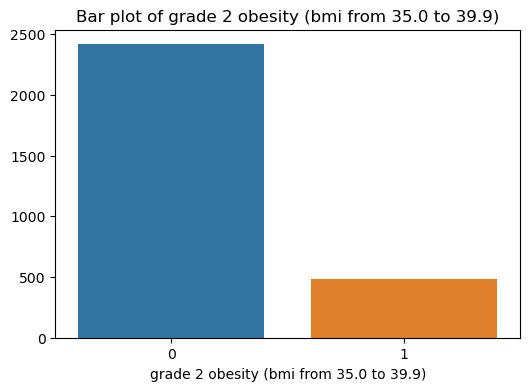

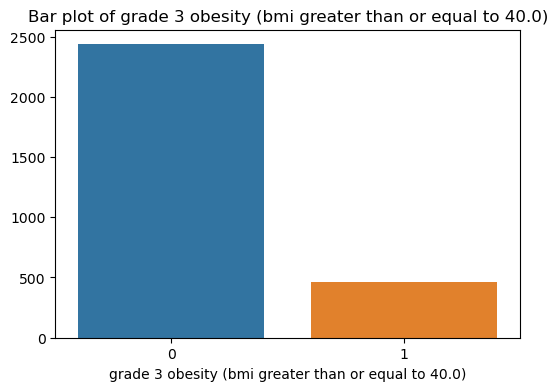

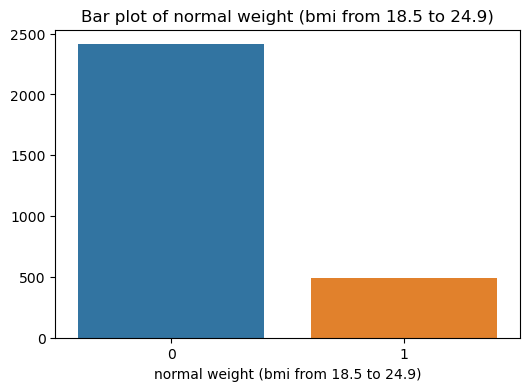

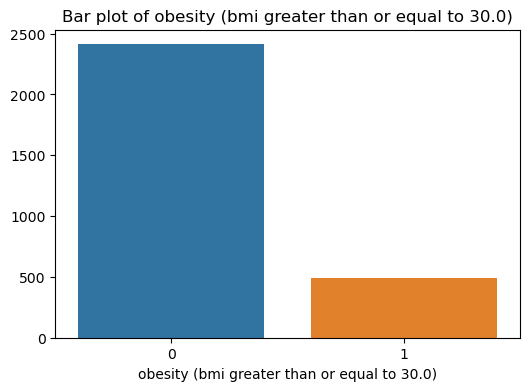

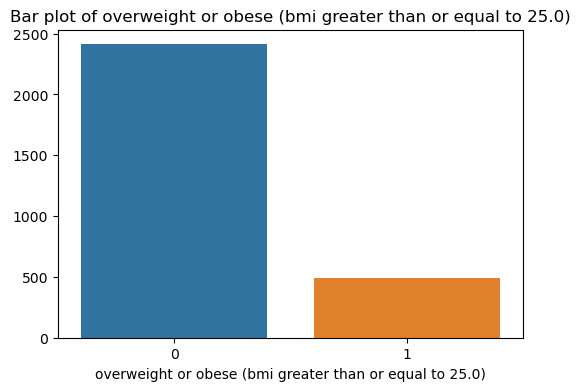

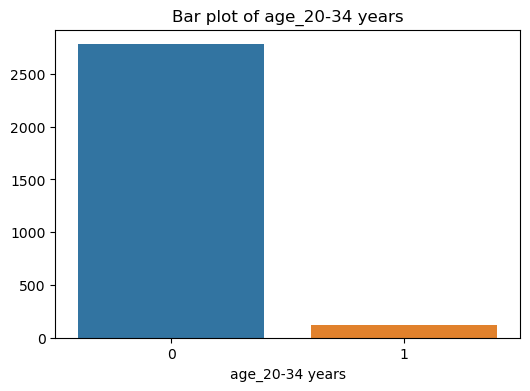

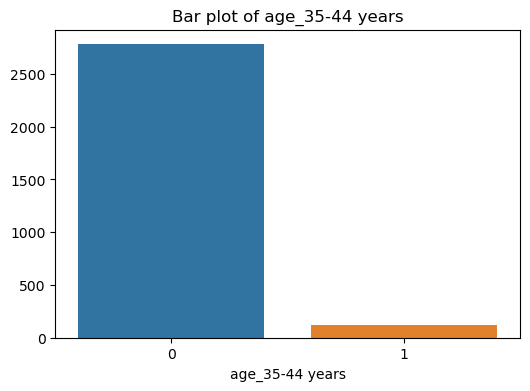

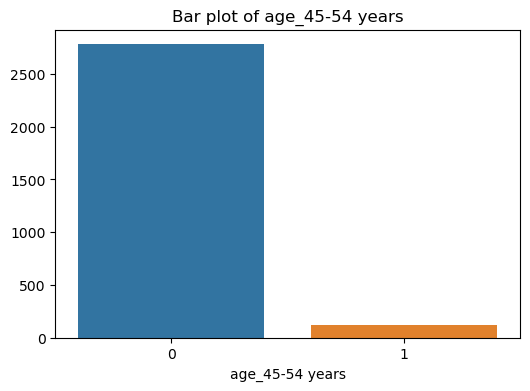

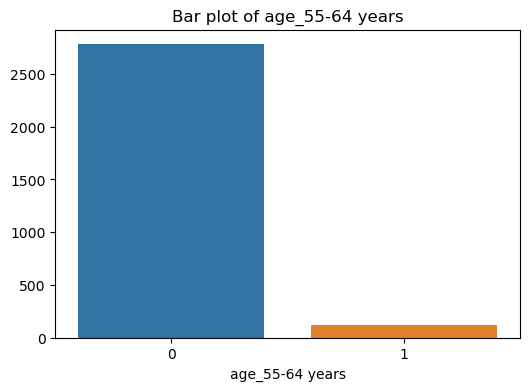

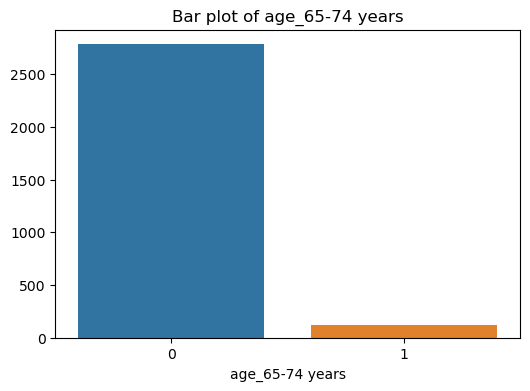

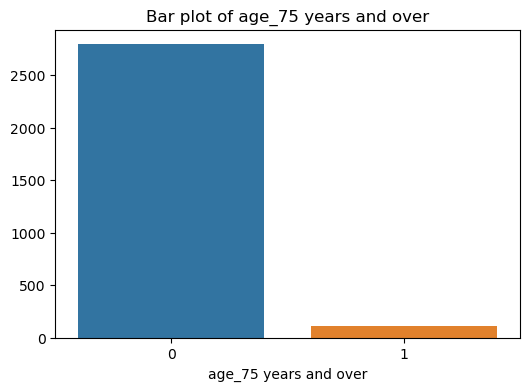

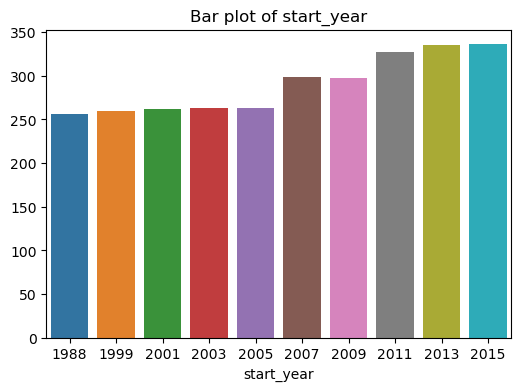

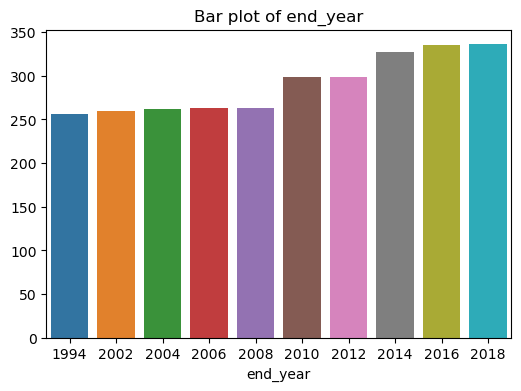

In [430]:
#Lets Visualize the dataset
#itterate through complete data set and make its bar plot
for i in wt_obesity.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=wt_obesity[i].value_counts().index, y=wt_obesity[i].value_counts().values)
    plt.title(f'Bar plot of {i}')
    plt.show()

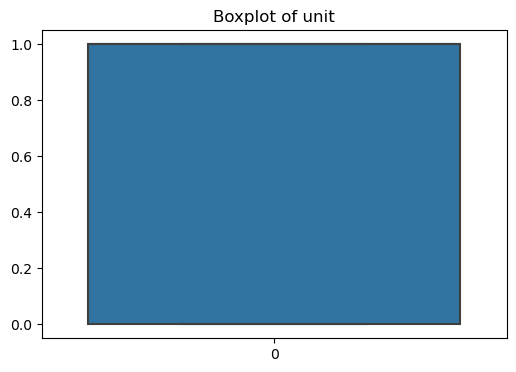

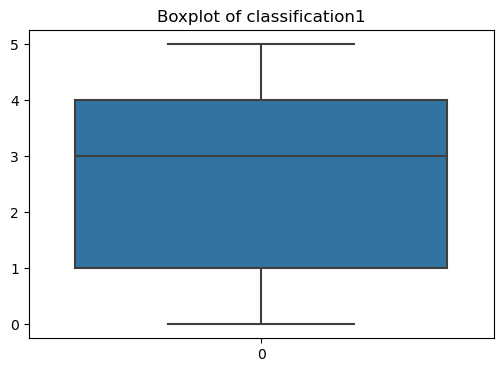

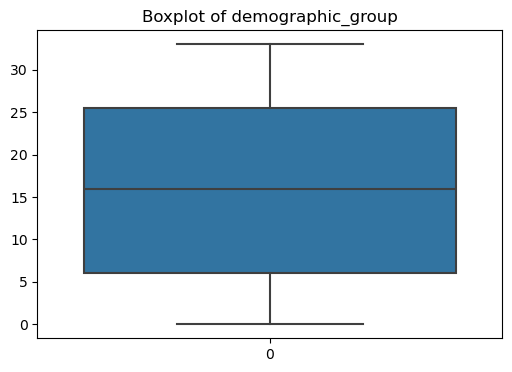

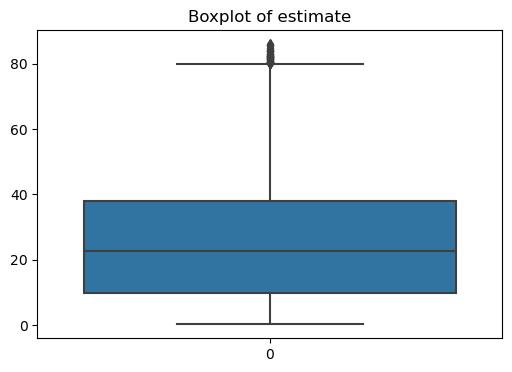

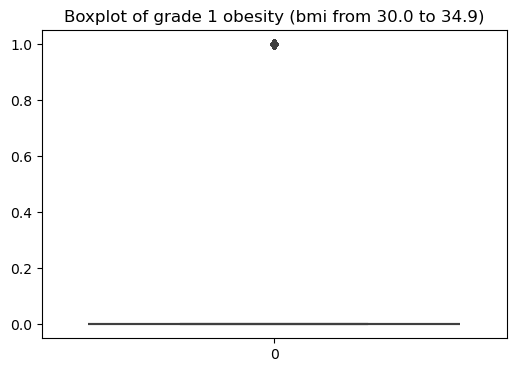

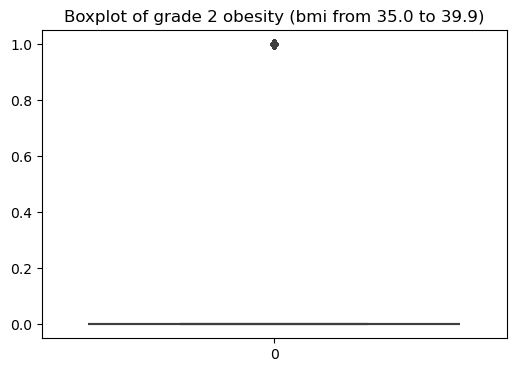

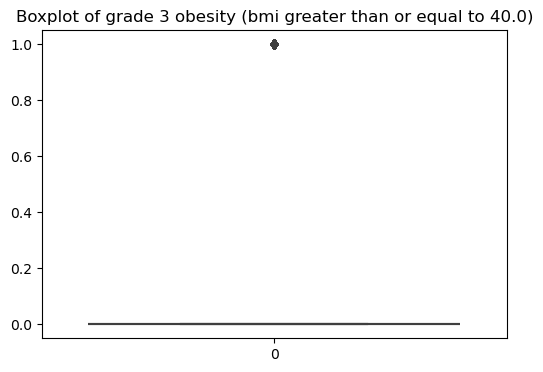

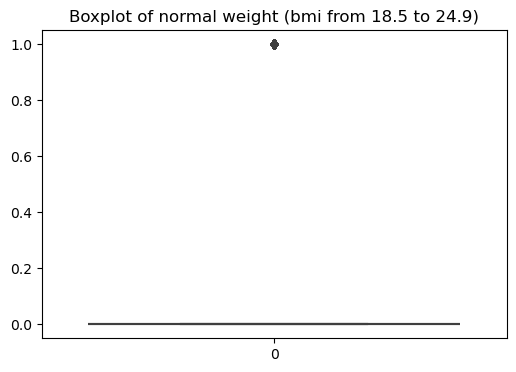

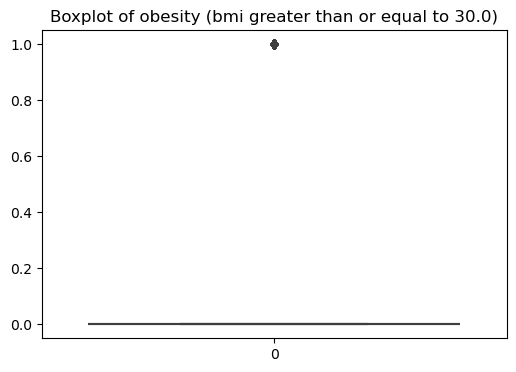

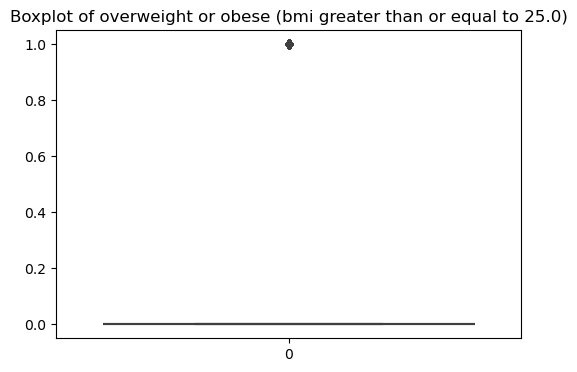

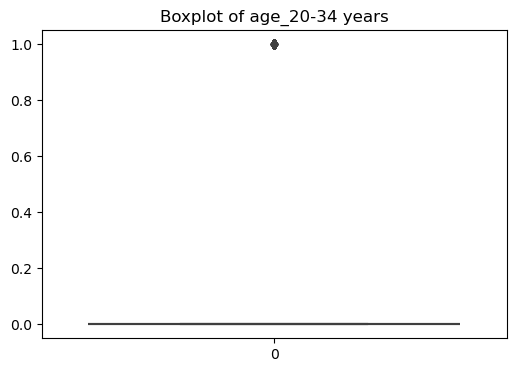

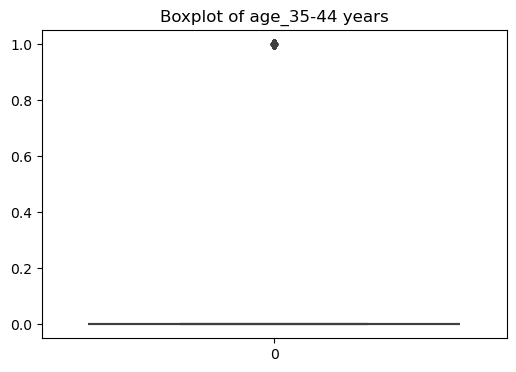

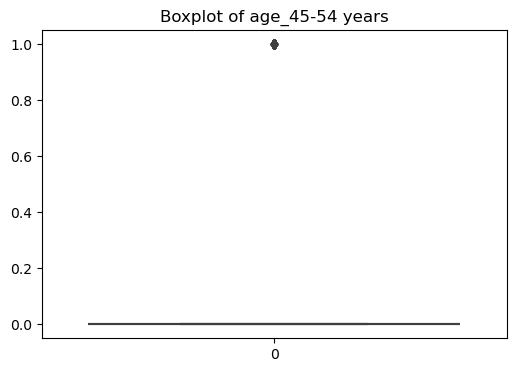

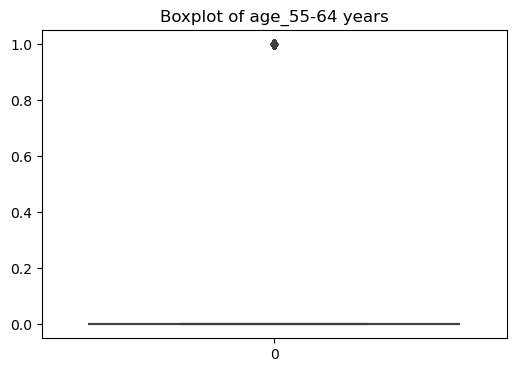

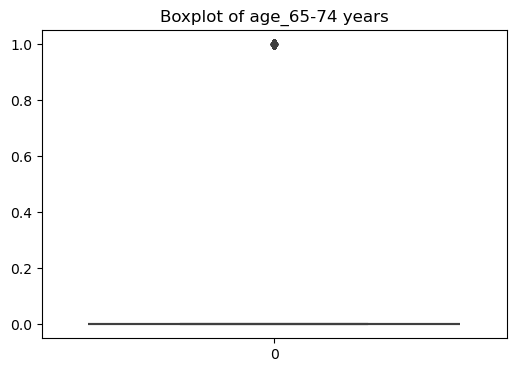

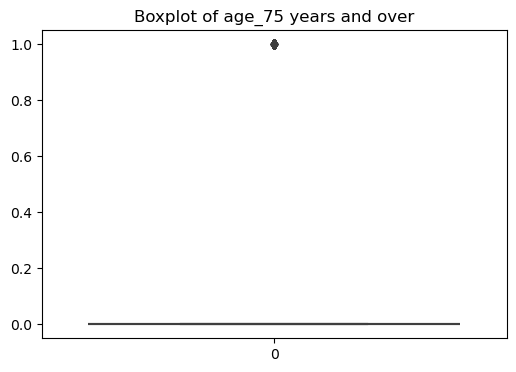

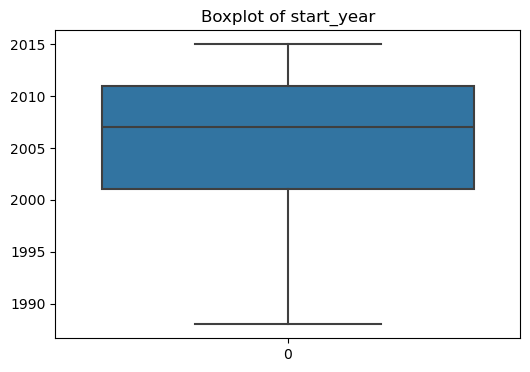

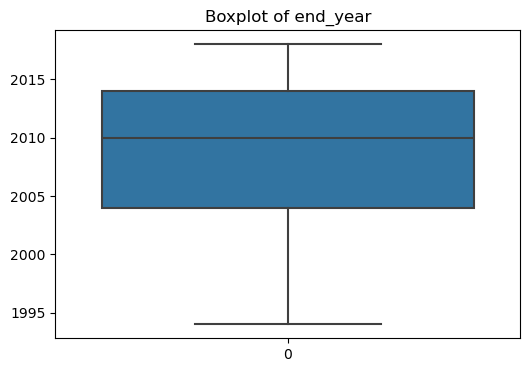

In [431]:
#Lets find the outliers in the dataset using boxplot
for i in wt_obesity.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(wt_obesity[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [435]:
#As we know that all the columns are bolean or categorical features except estimated percentage so we remove the outliers from the estimated percentage

# Calculate the first quartile
Q1 = wt_obesity['estimate'].quantile(0.25)
# Calculate the third quartile
Q3 = wt_obesity['estimate'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Remove the outliers
wt_obesity = wt_obesity[~((wt_obesity['estimate'] < (Q1 - 1.5 * IQR)) | (wt_obesity['estimate'] > (Q3 + 1.5 * IQR)))]
# Display the number of rows and columns after removing the outliers
wt_obesity.shape

(2853, 18)

In [436]:
wt_obesity.head()

,unit,classification1,demographic_group,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over,start_year,end_year
0,0,5,1,41.6,0,0,0,1,0,0,0,0,0,0,0,0,1988,1994
1,0,5,1,33.0,0,0,0,1,0,0,0,0,0,0,0,0,1999,2002
2,0,5,1,32.3,0,0,0,1,0,0,0,0,0,0,0,0,2001,2004
3,0,5,1,31.6,0,0,0,1,0,0,0,0,0,0,0,0,2003,2006
4,0,5,1,30.8,0,0,0,1,0,0,0,0,0,0,0,0,2005,2008


In [439]:
wt_obesity.head()

,unit,classification1,demographic_group,estimate,grade 1 obesity (bmi from 30.0 to 34.9),grade 2 obesity (bmi from 35.0 to 39.9),grade 3 obesity (bmi greater than or equal to 40.0),normal weight (bmi from 18.5 to 24.9),obesity (bmi greater than or equal to 30.0),overweight or obese (bmi greater than or equal to 25.0),age_20-34 years,age_35-44 years,age_45-54 years,age_55-64 years,age_65-74 years,age_75 years and over,start_year,end_year
0,0,5,1,41.6,0,0,0,1,0,0,0,0,0,0,0,0,1988,1994
1,0,5,1,33.0,0,0,0,1,0,0,0,0,0,0,0,0,1999,2002
2,0,5,1,32.3,0,0,0,1,0,0,0,0,0,0,0,0,2001,2004
3,0,5,1,31.6,0,0,0,1,0,0,0,0,0,0,0,0,2003,2006
4,0,5,1,30.8,0,0,0,1,0,0,0,0,0,0,0,0,2005,2008


In [440]:
#Since we dont have too large numbers in the dataset so we can skip the scaling of the dataset
#Lets split the data into features and target
random_state = 42

X = wt_obesity.drop("overweight or obese (bmi greater than or equal to 25.0)", axis = 1)
y = wt_obesity["overweight or obese (bmi greater than or equal to 25.0)"]

#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
# Display the number of rows and columns in the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2282, 17), (571, 17), (2282,), (571,))

In [441]:
#Lets apply the classification algorithim to the dataset then print the accuracy and classification report
# Create a classification model
classification_model = LinearRegression()
# Fit the model on the training data
classification_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = classification_model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred.round())
# Display the accuracy of the model
print(accuracy)

#print classification report
print(classification_report(y_test, y_pred.round()))



1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        88

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



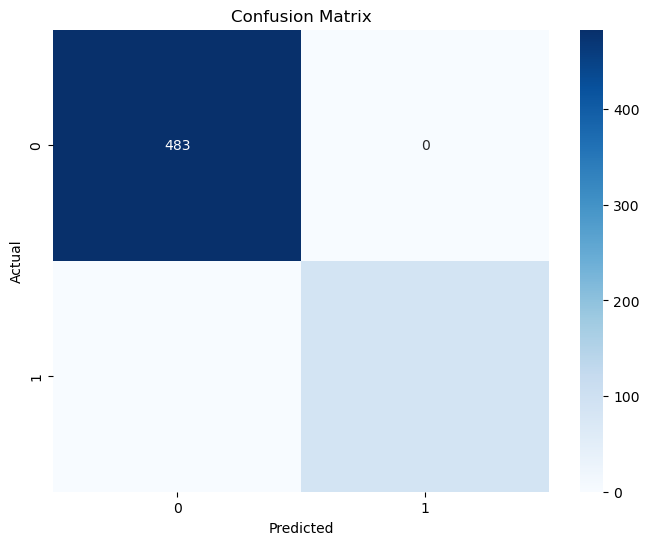

In [443]:
#Lets viusaluze the classification report
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred.round())
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [444]:
# Lets apply the random forest classfier to see the resutls
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier model
random_forest_classifier = RandomForestClassifier(random_state=random_state)
# Fit the model on the training data
random_forest_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = random_forest_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#classification report 
print(classification_report(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        88

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



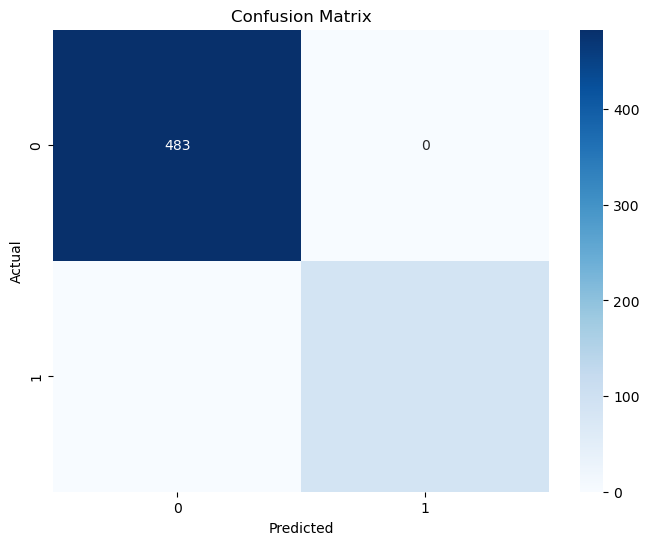

In [445]:
#Lets visualize the classification report
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Observations and Recomsndations**

## **1. Analysis of Adolescent Obesity dataset**
 - 1.1 This file contains 43 entries with 4 Columns:-
   - Location : State in USA
   - VAlue : Peecent Value Sample
   - 95 % Cl : Confidence Interval Values Ranging from and to 
   - Sample Size : The Size of the sample
  
 -  1.2 Null Values : We have no null values in the dataset

## **2. Analysis of Adult Obesity dataset**
 - 2.1 This file contains 55 entries with 4 Columns:-
   - Location : State in USA
   - VAlue : Peecent Value Sample
   - 95 % Cl : Confidence Interval Values Ranging from and to 
   - Sample Size : The Size of the sample
 -  2.2 Null Values : We have no null values in the dataset
## **3. Analysis of Nutrition Obesity dataset**
 - 3.1 This file contains 35042 entries with 14 Columns:-
   - 'YearStart' : Start of survey 
   - 'YearEnd' : End of Survey
   - 'LocationAbbr' : Location at survey carried out
   - 'State' : State survey carried out
   - 'Class' : Class for which survey is carried out i.e Obesity / Wt
   - 'Question' : Questions asked like how many percent in class has obesity
   - 'Data_Value_Type' : Data Type
   - 'Data_Value' : Data Value 
   - 'Low_Confidence_Limit' : Lower limit of confidence 
   - 'High_Confidence_Limit ' : Lower limit of confidence 
   - 'Sample_Size' : Size of people sample
   - 'Gender' : Sex
   - 'Grade' : Class of study
   - 'Race_Ethnicit : Race of the sample
 -  3.2 Null Values : We have fol values in the dataset:-
    - Gender                    30036
    - Grade                     25030
    - Race_Ethnicity            17521
    - Data_Value                 9309
    - Low_Confidence_Limit       9309
    - High_Confidence_Limit      9309
    - Sample_Size                9309  
-   3.4 Handling of Missing values in the dataset:-
    -  Since we know that in this dataset our values lies between the Data Value, upper and Lower confidence level. So in the dataset if all these three features are missing then they are not required and imputing these values may give us wrong insights about the dataset, as these are the main features.
    -  As we found that the missing values in each column are more than 50% so it is not good practice to impute them.So we have dropped the Columns, Race_Ethinicity, Gender and Class
    -  3.5 Encoding of Categorical Values:
    -  **Question Column**
       -      'Percent of students in grades 9-12 who have obesity': 1,
       -      'Percent of students in grades 9-12 who have an overweight classification': 2,
       -      'Percent of students in grades 9-12 watching 3 or more hours of television each school day': 3,
       -      'Percent of students in grades 9-12 who consume fruit less than 1 time daily': 4,
       -      'Percent of students in grades 9-12 who participate in daily physical education': 5,
       -      'Percent of students in grades 9-12 who consume vegetables less than 1 time daily': 6,
       -      'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day': 7,
       -      'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily': 8
    -  "**Class Column**"
       -      'Obesity / Weight Status': 1,
       -      'Fruits and Vegetables': 2,
       -      'Physical Activity': 3,
       -      'Television Viewing': 4,
       -      'Sugar Drinks': 5
  - 3.6 Outliers Removal / Scaling of the dataset
    - All the outlires are visualize thorugh BoxPlot and then removed using IQR Method with 1.5 x Time upper and Lower Limit to the dataset
    - The Data is scaled with MinMax Scler so, that the computuiona Time and cost is decreased and the Accuracy of the model is increased.


- 3.7 Final Results of the Nutrition Obesity after applying the linear Model 
  - Root Mean Squared Error : 0.35
  - R_Squared Value         : 0.99


## **4. Analysis of Weight Obesity dataset**
 - 4.1 This file contains 2899 entries with 17 Columns:-
   - 'unit': wether data is age oriented or not
   - 'classification1' :  Sex and race and Hispanic origin, Sex and age ,Percent of poverty level, Race and Hispanic origin, Sex, Total,  
   - 'demographic_group', 'year', 'estimate',
   - 'grade 1 obesity (bmi from 30.0 to 34.9)' : GradeI Obesity
   - 'grade 2 obesity (bmi from 35.0 to 39.9)' : GradeII Obesity
   - 'grade 3 obesity (bmi greater than or equal to 40.0)' : GradeIII Obesity
   - 'normal weight (bmi from 18.5 to 24.9)' : GradeIV Obesity
   - obesity (bmi greater than or equal to 30.0)' : GradeV Obesity
   - 'overweight or obese (bmi greater than or equal to 25.0)' : GradeVI Obesity
   - 'age_20-34 years', 'age_35-44 years', 'age_45-54 years' : GradeVII Obesity
   - 'age_55-64 years', 'age_65-74 years', 'age_75 years and over' : GradeVIII Obesity

- 4.2 Encode the dataset, clean the data, outlier detection and removal followed by scaling of the data as done in prevous dataset.
    - Add new columns start of the year and end of the year for better handling of the dataset
    - Drop the year column
    - Encode the demographic_group column
    - Encode the classification1 column
    - Encode the unit column
    - Remove the outliers from the dataset
    
    
- 4.5 Machine Learning Models for Classification Problem
    - Linear Regression (Accurcay Score Acheived = 1)
    - Random Forest Classifier (Accurcay Score Acheived = 1)
    
    
    
## 5. **Conclusions and Recommendations:**

### 5.1 Adolescent Obesity Dataset:
   - **Conclusion:** The dataset provides information on obesity rates among adolescents in different states of the USA.
   - **Recommendation:** Further analysis should be conducted to identify patterns and trends in adolescent obesity rates, which can help in implementing targeted interventions and programs to address the issue.

### 5.2 Adult Obesity Dataset:
   - **Conclusion:** The dataset contains information on obesity rates among adults in different states of the USA.
   - **Recommendation:** Conduct in-depth analysis to understand the prevalence of adult obesity in different states and develop strategies and policies to promote healthy lifestyles and combat obesity.

### 5.3 Nutrition Obesity Dataset:
   - **Conclusion:** The dataset includes a large number of entries and provides information on obesity, diet, and physical activity.
   - **Recommendation:** Due to significant missing values, caution should be exercised when imputing data. Focus on available information and conduct analyses to explore factors associated with obesity and their impact on different population groups.

### 5.4 Weight Obesity Dataset:
   - **Conclusion:** The dataset provides information on obesity rates categorized by demographic groups, age ranges, and classifications.
   - **Recommendation:** Conduct detailed analysis to explore obesity rates across different demographic groups, age ranges, and classifications. Apply machine learning models to predict obesity rates and identify important predictors.

## 6. **General Recommendations:**
- Conduct comprehensive studies using the available data to gain insights into the causes and consequences of obesity.
- Collaborate with healthcare providers, policymakers, and researchers to develop targeted interventions and policies to address obesity.
- Promote awareness campaigns to educate the public about the importance of a healthy lifestyle and the risks associated with obesity.
- Implement programs that focus on nutrition education, physical activity promotion, and access to healthy food options.
- Evaluate the effectiveness of interventions and make necessary adjustments based on the findings.
- Continuously monitor obesity rates and trends to assess the impact of interventions and identify areas that require further attention.
- Foster interdisciplinary collaborations to tackle obesity from multiple angles, including healthcare, education, urban planning, and policy-making.
- By following these recommendations, it is possible to make significant progress in addressing the obesity epidemic and improving public health outcomes.
